In [0]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# !pip install tqdm
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

## Reading Data from csv file

In [0]:
data = pd.read_csv('/content/drive/My Drive/sezzle cancer/data.csv')
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

From the data i have understood following things:

1. There is an id column, which is not important for prediction.
2. column **diagnosis** has the class label, we will use this column for classification
3. Unnamed: 32 feature has NaN value, which is not useful for classification.

So I have dropped all three columns and saved **diagnosis** column value into Y variable for further use.

In [0]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [0]:
# Y includes our labels and x includes our features
Y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

Shape of our data :

In [0]:
X.shape

(569, 30)

from value_count function we can get the count of Benign and Malignant cancer record in our data 

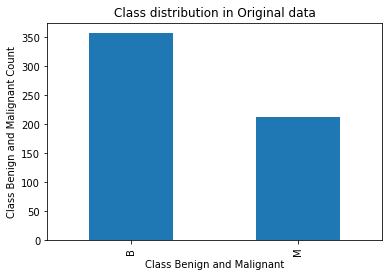

In [0]:
import matplotlib.pyplot as plt
Y.value_counts().plot(kind='bar')
plt.title('Class distribution in Original data')
plt.xlabel('Class Benign and Malignant')
plt.ylabel('Class Benign and Malignant Count')
plt.show()

In [0]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
print('Number of Benign: ',Y.value_counts()[0])
print('Number of Malignant : ',Y.value_counts()[1])

Number of Benign:  357
Number of Malignant :  212


## Data Visualization

We have all the features, but i do not know about which feature is more important, so we will do some data visualization on our data

In [0]:
X.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

From the describe method we can see that our all the features are not in same scale some feature have vary high values and some has very low, in this can we will use Standarization method to make all the feature in same scale.

In [0]:
# Function is used to convert text class to neumerical class
def Y_class(Y):
  if Y == 'B':
    return 0
  elif Y == 'M':
    return 1

#changing 
actual_value = Y
category = actual_value.map(Y_class) 
Y_class = category
print("Number of data points in our data", Y_class.shape)
Y_class.head(30)

Number of data points in our data (569,)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: diagnosis, dtype: int64

In [0]:
Y.head(30)

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
25    M
26    M
27    M
28    M
29    M
Name: diagnosis, dtype: object

In [0]:
drop_list = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se']
x = X.drop(drop_list,axis = 1 )

# PCA

PCA is a dimentionality reduction algo, which is used to reduce the dimention of data or we can say PCA will take only that data which is important for prediction. 

For PCA we use eigen vector and eigen values to identify the important feature.

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.



## Standardizing

PCA require Standarization of data, because it create multiple new feature vectors in new direction, so it is important to make all the features into same scale.

In [0]:
from sklearn.preprocessing import StandardScaler
X_std_model = StandardScaler()
X_std = X_std_model.fit(X)
X_std = X_std_model.transform(X)

In [0]:
import pickle
pickle_out = open("/content/drive/My Drive/sezzle cancer/X_std_model.pickle","wb")
pickle.dump(X_std_model, pickle_out)
pickle_out.close()

In [0]:
X_std.shape

(569, 30)

In [0]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
from numpy.linalg import eig
values, vectors = eig(cov_mat)

Covariance matrix 
[[ 1.00e+00  3.24e-01  1.00e+00  9.89e-01  1.71e-01  5.07e-01  6.78e-01
   8.24e-01  1.48e-01 -3.12e-01  6.80e-01 -9.75e-02  6.75e-01  7.37e-01
  -2.23e-01  2.06e-01  1.95e-01  3.77e-01 -1.05e-01 -4.27e-02  9.71e-01
   2.98e-01  9.67e-01  9.43e-01  1.20e-01  4.14e-01  5.28e-01  7.46e-01
   1.64e-01  7.08e-03]
 [ 3.24e-01  1.00e+00  3.30e-01  3.22e-01 -2.34e-02  2.37e-01  3.03e-01
   2.94e-01  7.15e-02 -7.66e-02  2.76e-01  3.87e-01  2.82e-01  2.60e-01
   6.63e-03  1.92e-01  1.44e-01  1.64e-01  9.14e-03  5.46e-02  3.53e-01
   9.14e-01  3.59e-01  3.44e-01  7.76e-02  2.78e-01  3.02e-01  2.96e-01
   1.05e-01  1.19e-01]
 [ 1.00e+00  3.30e-01  1.00e+00  9.88e-01  2.08e-01  5.58e-01  7.17e-01
   8.52e-01  1.83e-01 -2.62e-01  6.93e-01 -8.69e-02  6.94e-01  7.46e-01
  -2.03e-01  2.51e-01  2.28e-01  4.08e-01 -8.18e-02 -5.53e-03  9.71e-01
   3.04e-01  9.72e-01  9.43e-01  1.51e-01  4.57e-01  5.65e-01  7.73e-01
   1.89e-01  5.11e-02]
 [ 9.89e-01  3.22e-01  9.88e-01  1.00e+00  1.77e

In [0]:
print('Eigenvectors \n',vectors)
print('\nEigenvalues \n',values)

Eigenvectors 
 [[ 2.19e-01 -2.34e-01 -8.53e-03  4.14e-02 -3.78e-02  1.87e-02  1.24e-01
   7.45e-03 -2.23e-01  9.55e-02  4.15e-02  5.11e-02  1.20e-02 -5.95e-02
  -5.11e-02  1.51e-01 -2.03e-01 -1.47e-01 -2.25e-01 -7.02e-01  2.11e-01
  -2.11e-01 -1.32e-01  1.29e-01  1.92e-02 -1.83e-01  9.86e-02 -7.29e-02
  -4.97e-02  6.86e-02]
 [ 1.04e-01 -5.97e-02  6.45e-02 -6.03e-01  4.95e-02 -3.22e-02 -1.14e-02
  -1.31e-01  1.13e-01  2.41e-01 -3.02e-01  2.55e-01  2.03e-01  2.16e-02
  -1.08e-01  1.58e-01  3.87e-02  4.11e-02 -2.98e-02 -2.74e-04 -1.05e-02
   6.58e-05 -1.74e-02  2.46e-02 -8.47e-02  9.88e-02  5.55e-04 -9.48e-02
  -2.44e-01 -4.48e-01]
 [ 2.28e-01 -2.15e-01 -9.31e-03  4.20e-02 -3.74e-02  1.73e-02  1.14e-01
   1.87e-02 -2.24e-01  8.64e-02  1.68e-02  3.89e-02  4.41e-02 -4.85e-02
  -3.99e-02  1.14e-01 -1.95e-01 -1.58e-01 -2.40e-01  6.90e-01  3.84e-01
  -8.43e-02 -1.15e-01  1.25e-01 -2.70e-02 -1.17e-01  4.02e-02 -7.52e-02
  -1.77e-02  6.98e-02]
 [ 2.21e-01 -2.31e-01  2.87e-02  5.34e-02 -1.03e-02 

In [0]:
print("Shape of Eigen Vectors ", vectors.shape)
print("Shape of Eigen Values ", values.shape)

Shape of Eigen Vectors  (30, 30)
Shape of Eigen Values  (30,)


Eigen Values are variance explained by each of the vectors in its direction, So we will take those features which are having very high eigen values, So we are sorting our eigen vectors on the basis of eigen values.

In [0]:
eigen_pair = sorted([(np.abs(values[i]), vectors[:,i]) for i in range(len(values))], key = lambda x: x[0], reverse = True)
eigen_pair

[(13.304990794374556,
  array([0.22, 0.1 , 0.23, 0.22, 0.14, 0.24, 0.26, 0.26, 0.14, 0.06, 0.21,
         0.02, 0.21, 0.2 , 0.01, 0.17, 0.15, 0.18, 0.04, 0.1 , 0.23, 0.1 ,
         0.24, 0.22, 0.13, 0.21, 0.23, 0.25, 0.12, 0.13])),
 (5.701374603726141,
  array([-0.23, -0.06, -0.22, -0.23,  0.19,  0.15,  0.06, -0.03,  0.19,
          0.37, -0.11,  0.09, -0.09, -0.15,  0.2 ,  0.23,  0.2 ,  0.13,
          0.18,  0.28, -0.22, -0.05, -0.2 , -0.22,  0.17,  0.14,  0.1 ,
         -0.01,  0.14,  0.28])),
 (2.8229101550062277,
  array([-0.01,  0.06, -0.01,  0.03, -0.1 , -0.07,  0.  , -0.03, -0.04,
         -0.02,  0.27,  0.37,  0.27,  0.22,  0.31,  0.15,  0.18,  0.22,
          0.29,  0.21, -0.05, -0.04, -0.05, -0.01, -0.26, -0.24, -0.17,
         -0.17, -0.27, -0.23])),
 (1.9841275177301982,
  array([ 0.04, -0.6 ,  0.04,  0.05,  0.16,  0.03,  0.02,  0.07,  0.07,
          0.05,  0.1 , -0.36,  0.09,  0.11,  0.04, -0.03,  0.  ,  0.07,
          0.04,  0.02,  0.02, -0.63,  0.01,  0.03,  0.02, -0.

In [0]:
var_exp = [(i / sum(values))*100 for i in sorted(values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [0]:
print(var_exp, cum_var_exp)

[44.27202560752635, 18.97118204403309, 9.393163257431384, 6.602134915470138, 5.495768492346267, 4.024522039883358, 2.2507337129825093, 1.5887238000213282, 1.3896493745591103, 1.1689781894131503, 0.9797189875980182, 0.8705379007378843, 0.8045249871967303, 0.5233657454926365, 0.31378321676274074, 0.26620933651523176, 0.19799679253242677, 0.17539594502263664, 0.16492530592251559, 0.10386467483387157, 0.09990964637002532, 0.09146467510543389, 0.08113612588991075, 0.060183356667167204, 0.051604237916520586, 0.027258799547748742, 0.02300154625059588, 0.00529779290380932, 0.002496010324689034, 0.0004434827427360742] [ 44.27  63.24  72.64  79.24  84.73  88.76  91.01  92.6   93.99  95.16
  96.14  97.01  97.81  98.34  98.65  98.92  99.11  99.29  99.45  99.56
  99.66  99.75  99.83  99.89  99.94  99.97  99.99 100.   100.   100.  ]


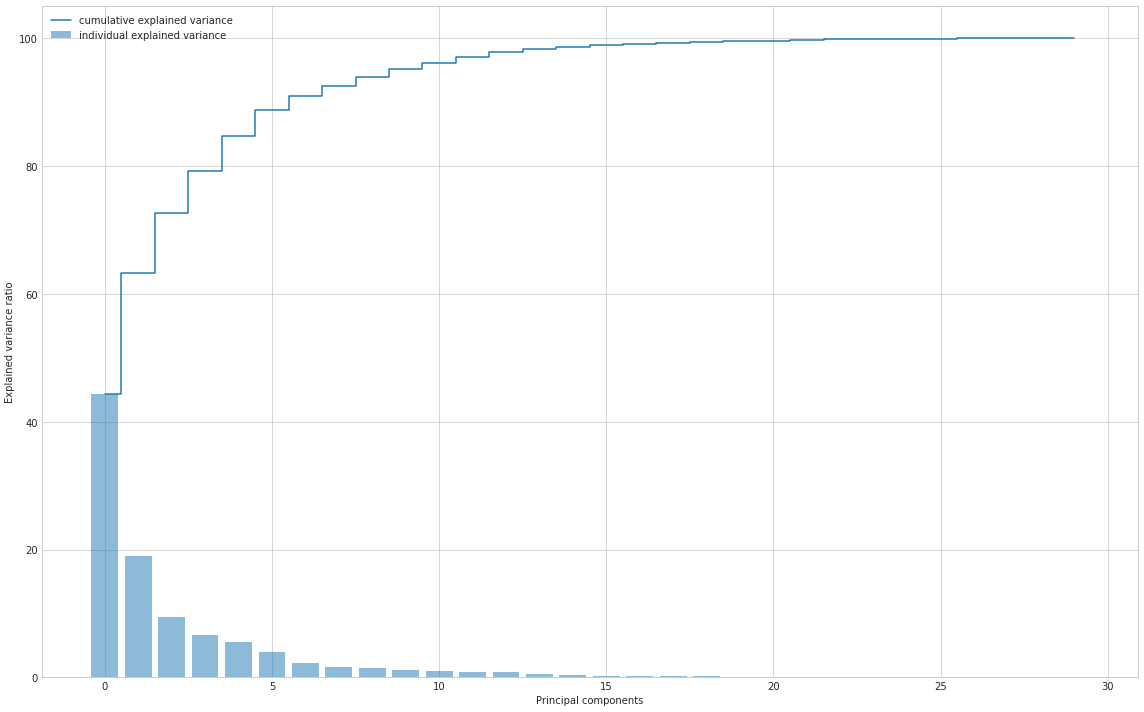

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 10))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

we have plotted the graph in decreasing order of eigen values.

In [0]:
# I have taken top 15 eigen vectors for creating new features.
matrix = []
for values in eigen_pair[:15]:
  matrix.append(values[1])

In [0]:
matrix

[array([0.22, 0.1 , 0.23, 0.22, 0.14, 0.24, 0.26, 0.26, 0.14, 0.06, 0.21,
        0.02, 0.21, 0.2 , 0.01, 0.17, 0.15, 0.18, 0.04, 0.1 , 0.23, 0.1 ,
        0.24, 0.22, 0.13, 0.21, 0.23, 0.25, 0.12, 0.13]),
 array([-0.23, -0.06, -0.22, -0.23,  0.19,  0.15,  0.06, -0.03,  0.19,
         0.37, -0.11,  0.09, -0.09, -0.15,  0.2 ,  0.23,  0.2 ,  0.13,
         0.18,  0.28, -0.22, -0.05, -0.2 , -0.22,  0.17,  0.14,  0.1 ,
        -0.01,  0.14,  0.28]),
 array([-0.01,  0.06, -0.01,  0.03, -0.1 , -0.07,  0.  , -0.03, -0.04,
        -0.02,  0.27,  0.37,  0.27,  0.22,  0.31,  0.15,  0.18,  0.22,
         0.29,  0.21, -0.05, -0.04, -0.05, -0.01, -0.26, -0.24, -0.17,
        -0.17, -0.27, -0.23]),
 array([ 0.04, -0.6 ,  0.04,  0.05,  0.16,  0.03,  0.02,  0.07,  0.07,
         0.05,  0.1 , -0.36,  0.09,  0.11,  0.04, -0.03,  0.  ,  0.07,
         0.04,  0.02,  0.02, -0.63,  0.01,  0.03,  0.02, -0.09, -0.07,
         0.01, -0.04, -0.08]),
 array([-0.04,  0.05, -0.04, -0.01,  0.37, -0.01, -0.09,  0.04

In [0]:
X_pca = np.array(matrix).transpose()

In [0]:
X_pca.shape

(30, 15)

# Projection Onto the New Feature Space

we will use the 30*15-dimensional projection matrix to transform our data onto the new subspace via the equation
Y=X×W, where Y is a 569*15 matrix of our transformed samples.

In [0]:
pickle_out = open('/content/drive/My Drive/sezzle cancer/X_pca.pickle','wb')
pickle.dump(X_pca, pickle_out)
pickle_out.close()

In [0]:
X_re = X_std.dot(X_pca)

In [0]:
X_re.shape

(569, 15)

In [0]:
from sklearn.model_selection import train_test_split
X_t_re, X_test_re, Y_t_re, Y_test_re = train_test_split(X_re, Y_class, test_size=0.05, random_state=42)
X_train_re, X_val_re, Y_train_re, Y_val_re = train_test_split(X_t_re, Y_t_re, test_size=0.05, random_state=42)

In [0]:
X_train_re.shape, Y_train_re.shape, X_val_re.shape, Y_val_re.shape

((513, 15), (513,), (27, 15), (27,))

# Applying Model

## Logistic Regression :

In [0]:
C_list = []
i = 0.0001
for count in range(25):
    C_list.append(i)
    i = round(i+0.001,4)

In [0]:
def AUC_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for C in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = LogisticRegression(C=C,penalty="l2")
        clf.fit(X_train, Y_train)
                # predict the response
        probs_train = clf.predict_proba(X_train)
        preds_train = probs_train[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
        probs_cv = clf.predict_proba(X_cv)
        preds_cv = probs_cv[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, preds_cv)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
    
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('C Value')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

### Learning Curve

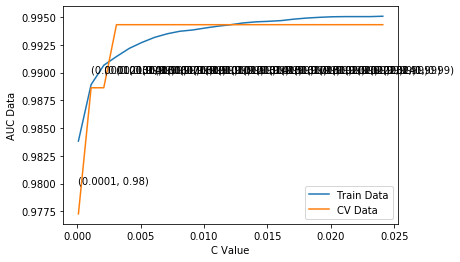

Train_Accuracy  CV_Accuracy
0.0001        0.983836     0.977273
0.0011        0.988920     0.988636
0.0021        0.990663     0.988636
0.0031        0.991445     0.994318
0.0041        0.992179     0.994318
0.0051        0.992716     0.994318
0.0061        0.993173     0.994318
0.0071        0.993498     0.994318
0.0081        0.993727     0.994318
0.0091        0.993841     0.994318
0.0101        0.994020     0.994318
0.0111        0.994183     0.994318
0.0121        0.994313     0.994318
0.0131        0.994476     0.994318
0.0141        0.994574     0.994318
0.0151        0.994623     0.994318
0.0161        0.994688     0.994318
0.0171        0.994818     0.994318
0.0181        0.994916     0.994318
0.0191        0.994981     0.994318
0.0201        0.995030     0.994318
0.0211        0.995046     0.994318
0.0221        0.995046     0.994318
0.0231        0.995046     0.994318
0.0241        0.995079     0.994318

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_curve(X_train_re, Y_train_re, X_val_re, Y_val_re)

In [0]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = LogisticRegression(C=C,penalty="l2")
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

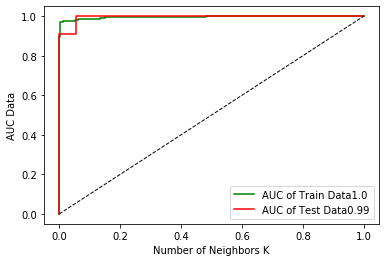

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0241,X_train_re, Y_train_re, X_test_re, Y_test_re)

In [0]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['Benign', 'Malignant'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[322   1]
 [ 13 177]]
Normalized confusion matrix
[[1.   0.  ]
 [0.07 0.93]]


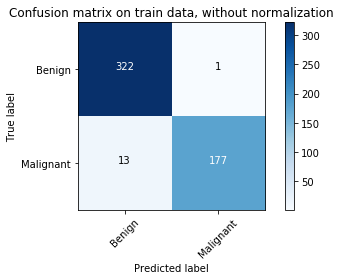

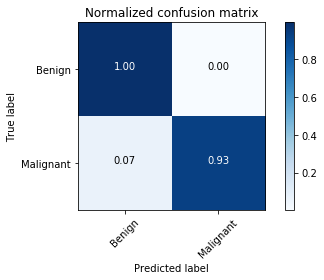

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


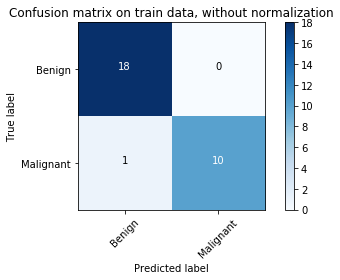

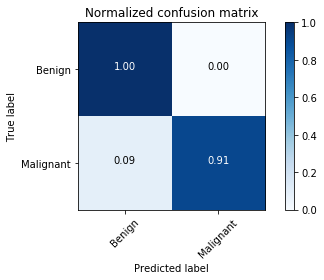

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# This function will give top 10 positive class feature which has hightest probability from BOW data with l1 regularizer
def most_informative_feature_for_class(data, classifier):
    topn = sorted(zip(classifier.coef_[0], [i for i in range(data.shape[1])] ), reverse=True)
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [0]:
X_re.shape

(569, 15)

Most Important Feature for class Logistic Regression : 


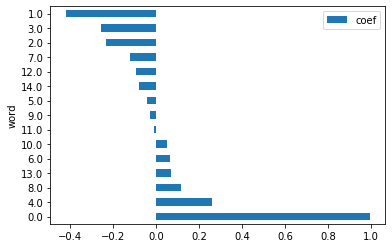

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
clf.coef_

array([[ 1.  , -0.42, -0.23, -0.26,  0.26, -0.04,  0.07, -0.12,  0.12,
        -0.03,  0.05, -0.01, -0.09,  0.07, -0.08]])

# SVM

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [0]:
def AUC_svm_curve(X_train, Y_train, X_cv, Y_cv):
    auc_train = []
    auc_cv = []
    for alpha in C_list:
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
        clf = SGDClassifier(alpha=alpha,penalty="l2", loss="hinge")
        clf.fit(X_train, Y_train)
                # predict the response
        preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
        clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
        clf_sigmoid.fit(X_train, Y_train)
        
#       predicting probabilistic value from the Train data.
        prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
        auc_train.append(metrics.auc(fpr_train, tpr_train))
        
        
#       predicting probabilistic value from the cross validation data.
        preds_cv = clf.predict(X_cv)
        prob_cv_sigmoid = clf_sigmoid.predict_proba(X_cv)[:,1]
        fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_cv, prob_cv_sigmoid)
        auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 

    #   Ploting AUC curve for each value of C to find best which is neihter overfit nor underfit much.
    # alpha_log = [round(log10(x),2) for x in r]
    df = pd.DataFrame({'Train_Accuracy': auc_train, 'CV_Accuracy': auc_cv},  index = C_list) 

    # Plotting the graph between alpha and its AUC value to find best alpha for our model.    
    plt.plot(C_list,auc_train,label="Train Data")
    # for xy in zip(alpha, np.round(auc_train,2)):
    #         plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.plot(C_list,auc_cv,label="CV Data")
    for xy in zip(C_list, np.round(auc_cv,2)):
            plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Value of Alpha')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    return df

### Learning Curve

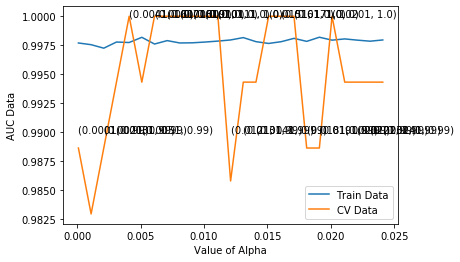

Train_Accuracy  CV_Accuracy
0.0001        0.997694     0.988636
0.0011        0.997548     0.982955
0.0021        0.997246     0.988636
0.0031        0.997776     0.994318
0.0041        0.997735     1.000000
0.0051        0.998183     0.994318
0.0061        0.997605     1.000000
0.0071        0.997898     1.000000
0.0081        0.997694     1.000000
0.0091        0.997711     1.000000
0.0101        0.997776     1.000000
0.0111        0.997857     1.000000
0.0121        0.997955     0.985795
0.0131        0.998159     0.994318
0.0141        0.997808     0.994318
0.0151        0.997654     1.000000
0.0161        0.997808     1.000000
0.0171        0.998094     1.000000
0.0181        0.997833     0.988636
0.0191        0.998191     0.988636
0.0201        0.997939     1.000000
0.0211        0.998045     0.994318
0.0221        0.997939     0.994318
0.0231        0.997849     0.994318
0.0241        0.997955     0.994318

In [0]:
# Applying logistic regression on each value of C to find best C.
AUC_svm_curve(X_train_re, Y_train_re, X_val_re, Y_val_re)

In [0]:
def final_Model(C,X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(alpha=C,penalty="l2", loss="hinge")
    clf.fit(X_train, Y_train)
            # predict the response
    preds_train = clf.predict(X_train)
#       SGDClassifier using sigmoid calibration
    clf_sigmoid = CalibratedClassifierCV(clf,cv = 4, method = "isotonic")
    clf_sigmoid.fit(X_train, Y_train)

#       predicting probabilistic value from the Train data.
    prob_train_sigmoid = clf_sigmoid.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, prob_train_sigmoid)
    auc_train = metrics.auc(fpr_train, tpr_train)


#       predicting probabilistic value from the cross validation data.
    preds_test = clf.predict(X_test)
    prob_test_sigmoid = clf_sigmoid.predict_proba(X_test)[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, prob_test_sigmoid)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, preds_test, preds_train

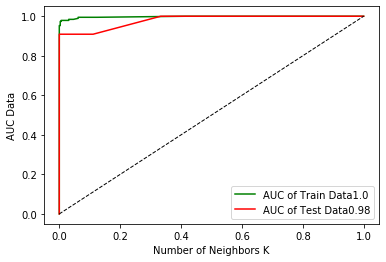

In [0]:
# For the value of C at 0.01 data is not much overfit and underfit, so we are taking that as a C value for our LR model
clf, y_pred, y_train_pred = final_Model(0.0121,X_train_re, Y_train_re, X_test_re, Y_test_re)

Confusion matrix, without normalization
[[322   1]
 [  6 184]]
Normalized confusion matrix
[[1.   0.  ]
 [0.03 0.97]]


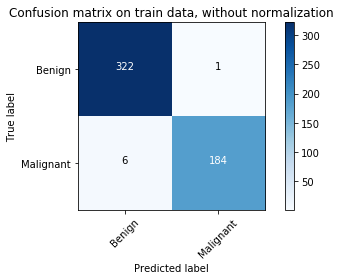

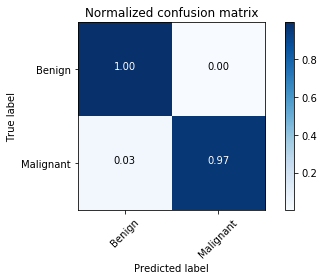

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[18  0]
 [ 1 10]]
Normalized confusion matrix
[[1.   0.  ]
 [0.09 0.91]]


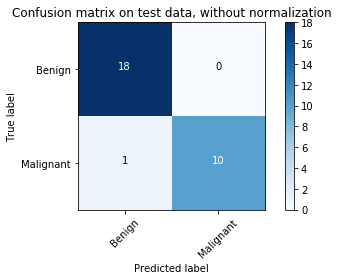

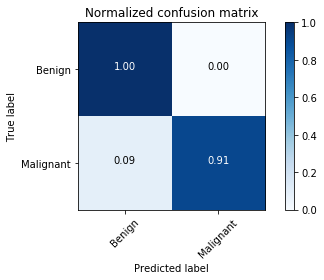

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Most Important Feature for class Logistic Regression : 


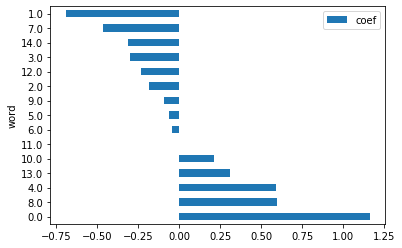

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_informative_feature_for_class(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
clf.coef_

array([[ 1.16, -0.69, -0.18, -0.3 ,  0.59, -0.06, -0.04, -0.46,  0.59,
        -0.09,  0.22, -0.  , -0.23,  0.31, -0.31]])

# Random Forest

In [0]:
max_depth = [1,5,10,50,500,1000]
n_estimators = [5,10,100,500]

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
def AUC_curve_rf(X_train,Y_train,X_val, Y_val,max_depth,n_estimators):
    AUC_Train = np.zeros((len(max_depth), len(n_estimators)))
    AUC_CV = np.zeros((len(max_depth), len(n_estimators)))
    for depth in range(len(max_depth)):
        for estimators in range(len(n_estimators)):
    #     Applying Logistic Regression with l1 regularization on trainng data for each C
            clf = RandomForestClassifier(max_depth=max_depth[depth], n_estimators=n_estimators[estimators])
            clf.fit(X_train, Y_train)
                # predict the response
            probs_train = clf.predict_proba(X_train)
            preds_train = probs_train[:,1]
            fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
#             auc_train.append(metrics.auc(fpr_train, tpr_train))
    #     predicting probabilistic value from the cross validation data.
            probs_cv = clf.predict_proba(X_val)
            preds_cv = probs_cv[:,1]
            fpr_cv, tpr_cv, threshold_cv = metrics.roc_curve(Y_val, preds_cv)
#             auc_cv.append(metrics.auc(fpr_cv, tpr_cv)) 
#             print("Depth ",max_depth[depth],"Split ",min_samples_split[split], "AUC_train ",metrics.auc(fpr_train, tpr_train),
#                  "AUC_cv ",metrics.auc(fpr_cv, tpr_cv))
            
            AUC_Train[depth][estimators] = metrics.auc(fpr_train, tpr_train)
            AUC_CV[depth][estimators] = metrics.auc(fpr_cv, tpr_cv)
    return AUC_Train, AUC_CV

In [0]:
def plot_graph(AUC_train, AUC_cv):
    df_train = pd.DataFrame(AUC_train, columns = n_estimators,index = max_depth)
    df_cv = pd.DataFrame(AUC_cv, columns = n_estimators,index = max_depth)
    # plt.subplot(2, 1, 1)
    sns.heatmap(df_train, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on Train data")
    plt.show()
    # plt.subplot(2, 1, 2)
    sns.heatmap(df_cv, annot=True, fmt="g", cmap='viridis')
    plt.ylabel("Depth")
    plt.xlabel("n_estimators")
    plt.title("AUC values on CV data")
    plt.show()
    # print(df)

In [0]:
def final_Model_rf(X_train,Y_train,X_test,Y_test,max_depth,n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    # getting probabilistic value from my model on Train data
    probs_train = clf.predict_proba(X_train)
    preds_train= probs_train[:,1]
    y_train_pred = clf.predict(X_train)
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train, preds_train)
    auc_train = metrics.auc(fpr_train, tpr_train)

    # getting probabilistic and predicted value from my model on Train data
    probs_test = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test, preds_test)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Graph to show Accuracy percentage on train and test set data.
    plt.plot(fpr_train,tpr_train,label="AUC of Train Data"+str(np.round(auc_train,2)), color = 'green')
    plt.plot(fpr_test,tpr_test,label="AUC of Test Data"+str(np.round(auc_test,2)), color = 'red')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Data')
    plt.legend()
    plt.show()
    
    return clf, y_pred, y_train_pred

In [0]:
AUC_train, AUC_cv = AUC_curve_rf(X_train_re,Y_train_re,X_val_re, Y_val_re,max_depth,n_estimators)

### Learning Curve

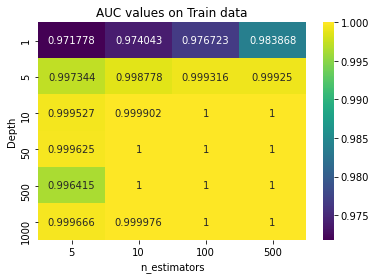

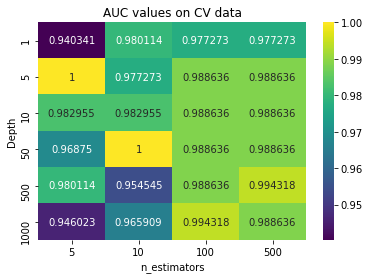

In [0]:
plot_graph(AUC_train, AUC_cv)

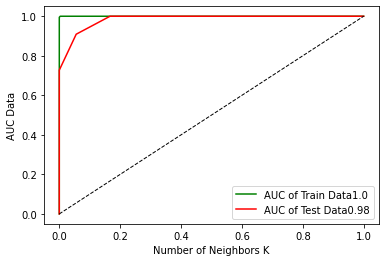

In [0]:
clf, y_pred, y_train_pred = final_Model_rf(X_train_re, Y_train_re, X_test_re, Y_test_re,50,10)

Confusion matrix, without normalization
[[323   0]
 [  1 189]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


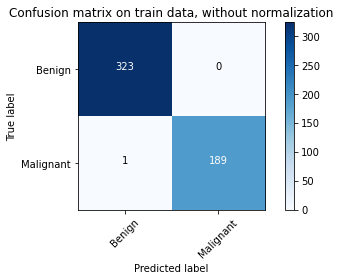

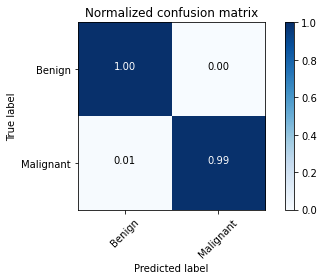

In [0]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train_re, y_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on train data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Confusion matrix, without normalization
[[17  1]
 [ 1 10]]
Normalized confusion matrix
[[0.94 0.06]
 [0.09 0.91]]


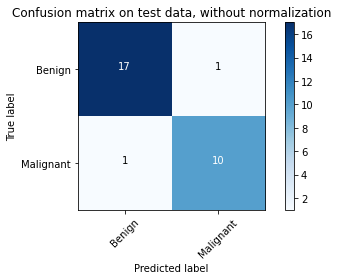

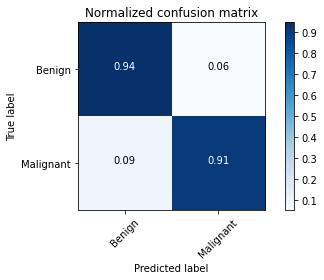

In [0]:
# Compute confusion matrix on train Data
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_re, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix on test data, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [0]:
pickle_out = open('/content/drive/My Drive/sezzle cancer/rf_model.pickle','wb')
pickle.dump(clf, pickle_out)
pickle_out.close()

In [0]:
# most important positive class feature
def most_important_feature_rf(data, classifier):
    weight = classifier.feature_importances_
    topn = sorted(zip(weight, [i for i in range(data.shape[1])]), key = lambda x: x[0])
    column_names = ["word", "coef"]
    df = pd.DataFrame(columns = column_names)
    row = 0
    for coe, name in topn:
        df.loc[row] = [name, coe]
        row+=1
    return df

In [0]:
clf.feature_importances_

array([0.51, 0.07, 0.05, 0.04, 0.04, 0.03, 0.04, 0.02, 0.02, 0.01, 0.03,
       0.02, 0.05, 0.03, 0.04])

Most Important Feature for class Logistic Regression : 


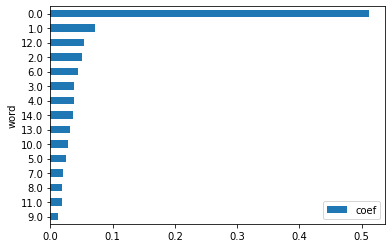

In [0]:
print("Most Important Feature for class Logistic Regression : ")
df = most_important_feature_rf(X_re,clf)
ax = df.plot.barh(x='word', y='coef')

In [0]:
import pydotplus
from sklearn.tree import export_graphviz
def decision_trees_save(clf, iteration, feature_names, target_names):
    file_name = "cancer_"+str(iteration)+"_pca.png"
    dot_data = export_graphviz(clf, out_file = None,feature_names=feature_names, class_names = target_names)
    # print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    # print(graph)
    graph.write_png(file_name)
    print("Decision tree {} saved as png file".format(iteration+1))

In [0]:
for i in range(len(clf.estimators_)):
    decision_trees_save(clf.estimators_[i], i, [i for i in range(X_re.shape[1])], ['Benign', 'Malignant'])

Decision tree 1 saved as png file
Decision tree 2 saved as png file
Decision tree 3 saved as png file
Decision tree 4 saved as png file
Decision tree 5 saved as png file
Decision tree 6 saved as png file
Decision tree 7 saved as png file
Decision tree 8 saved as png file
Decision tree 9 saved as png file
Decision tree 10 saved as png file
Decision tree 11 saved as png file
Decision tree 12 saved as png file
Decision tree 13 saved as png file
Decision tree 14 saved as png file
Decision tree 15 saved as png file
Decision tree 16 saved as png file
Decision tree 17 saved as png file
Decision tree 18 saved as png file
Decision tree 19 saved as png file
Decision tree 20 saved as png file
Decision tree 21 saved as png file
Decision tree 22 saved as png file
Decision tree 23 saved as png file
Decision tree 24 saved as png file
Decision tree 25 saved as png file
Decision tree 26 saved as png file
Decision tree 27 saved as png file
Decision tree 28 saved as png file
Decision tree 29 saved as png

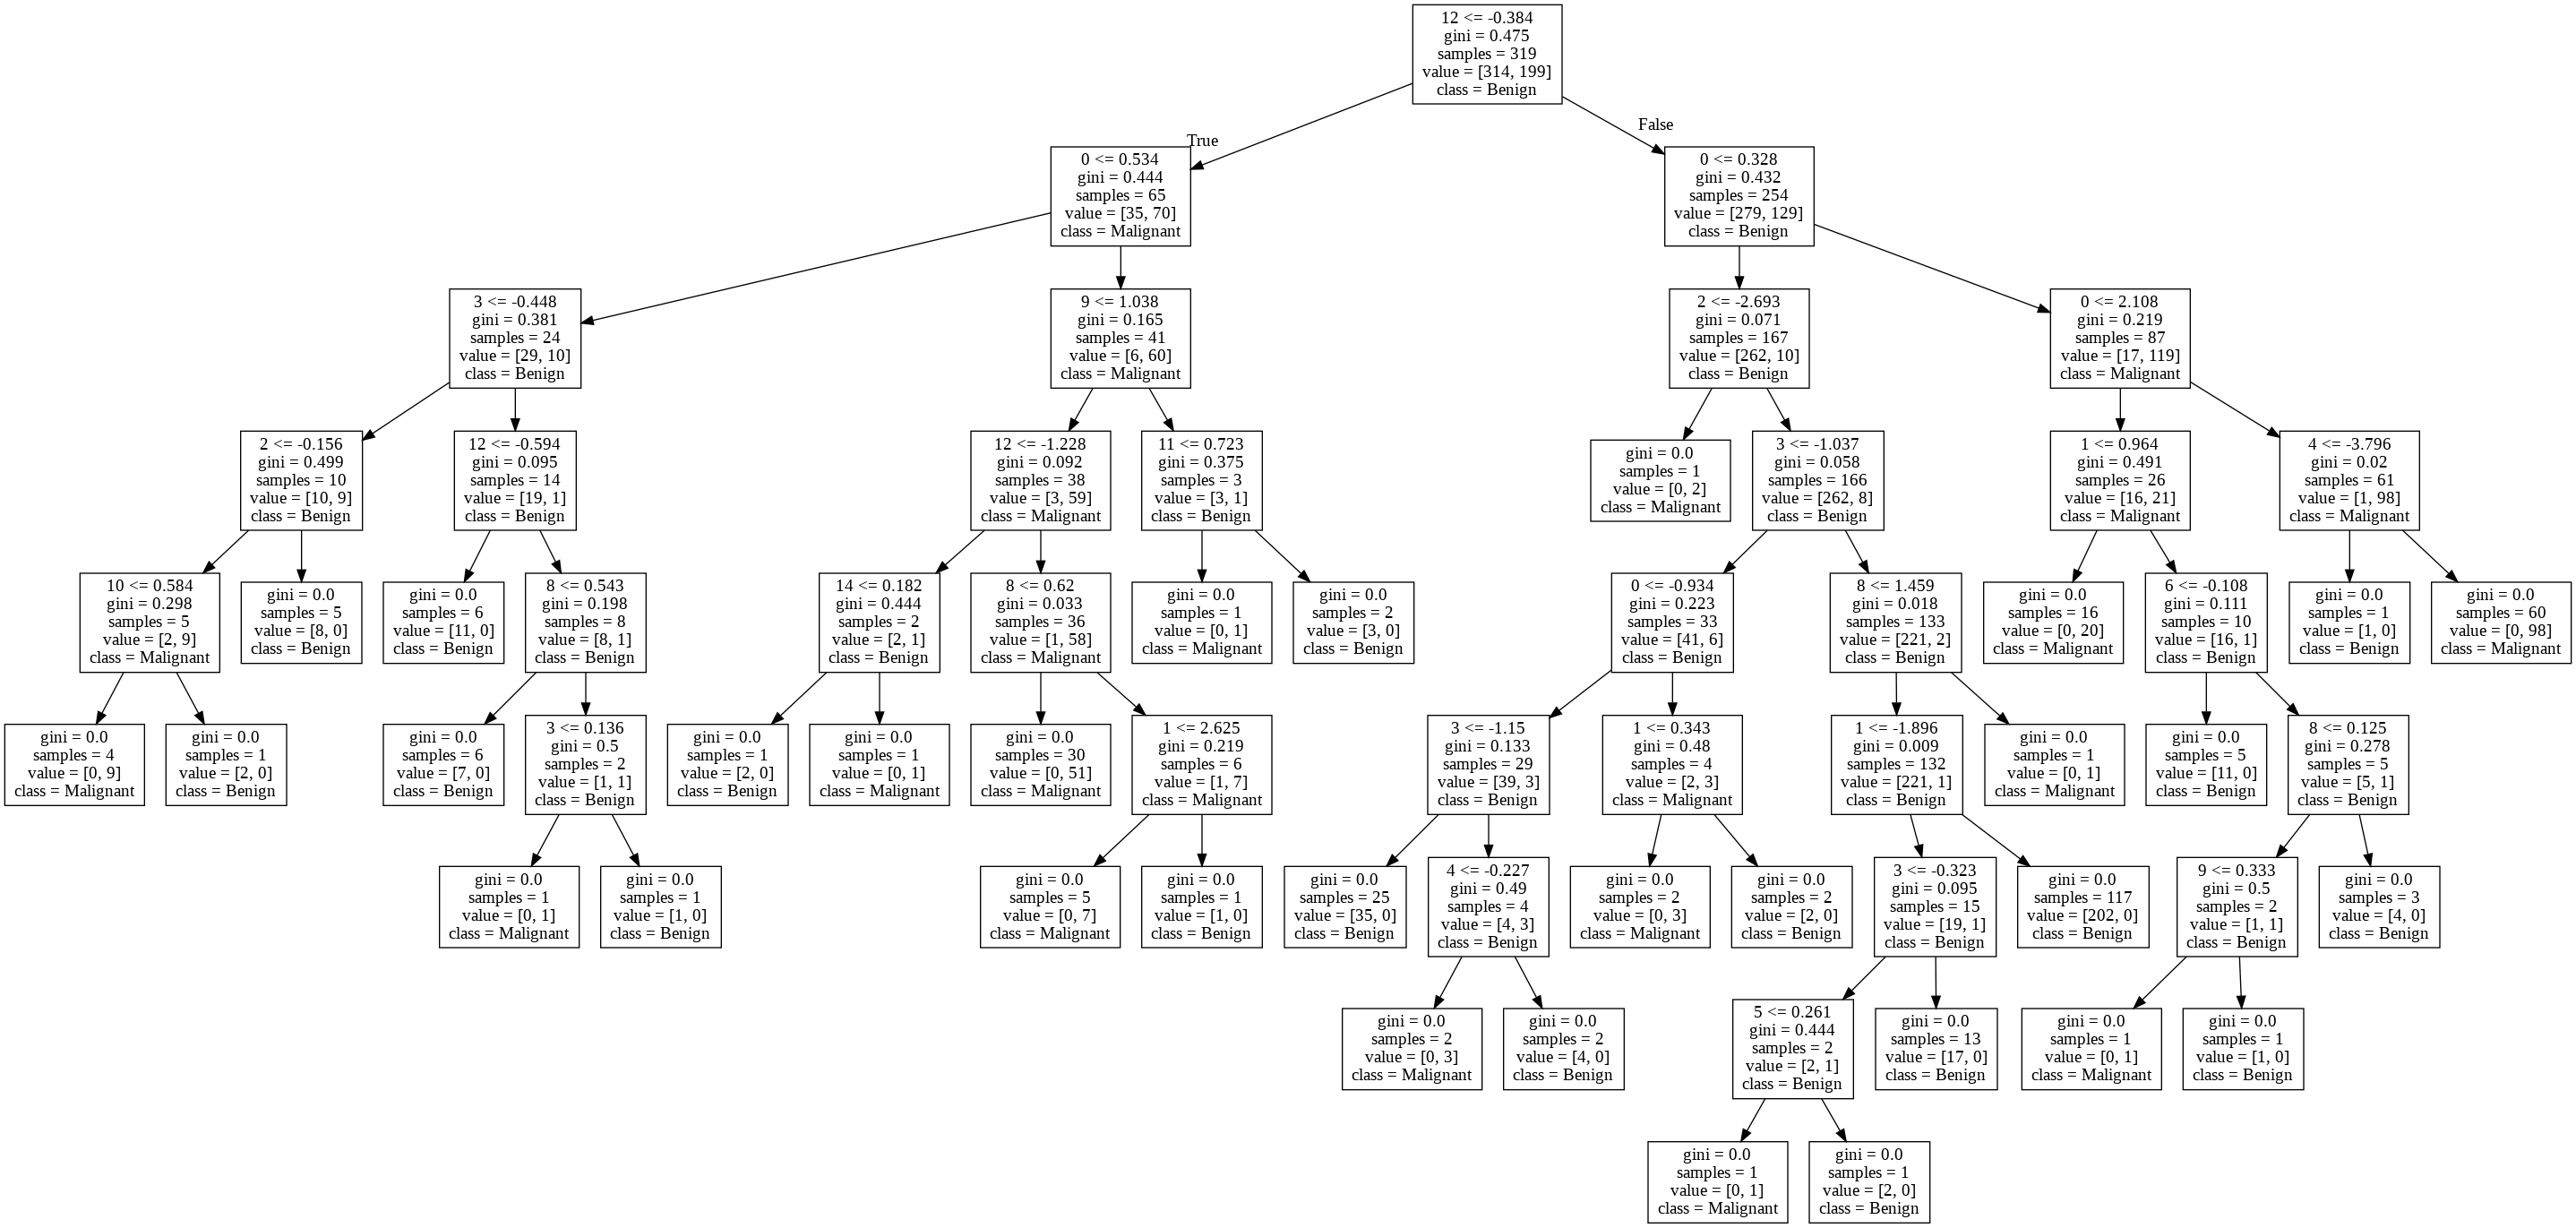

In [0]:
from PIL import Image
image = Image.open("cancer_0.png")
image

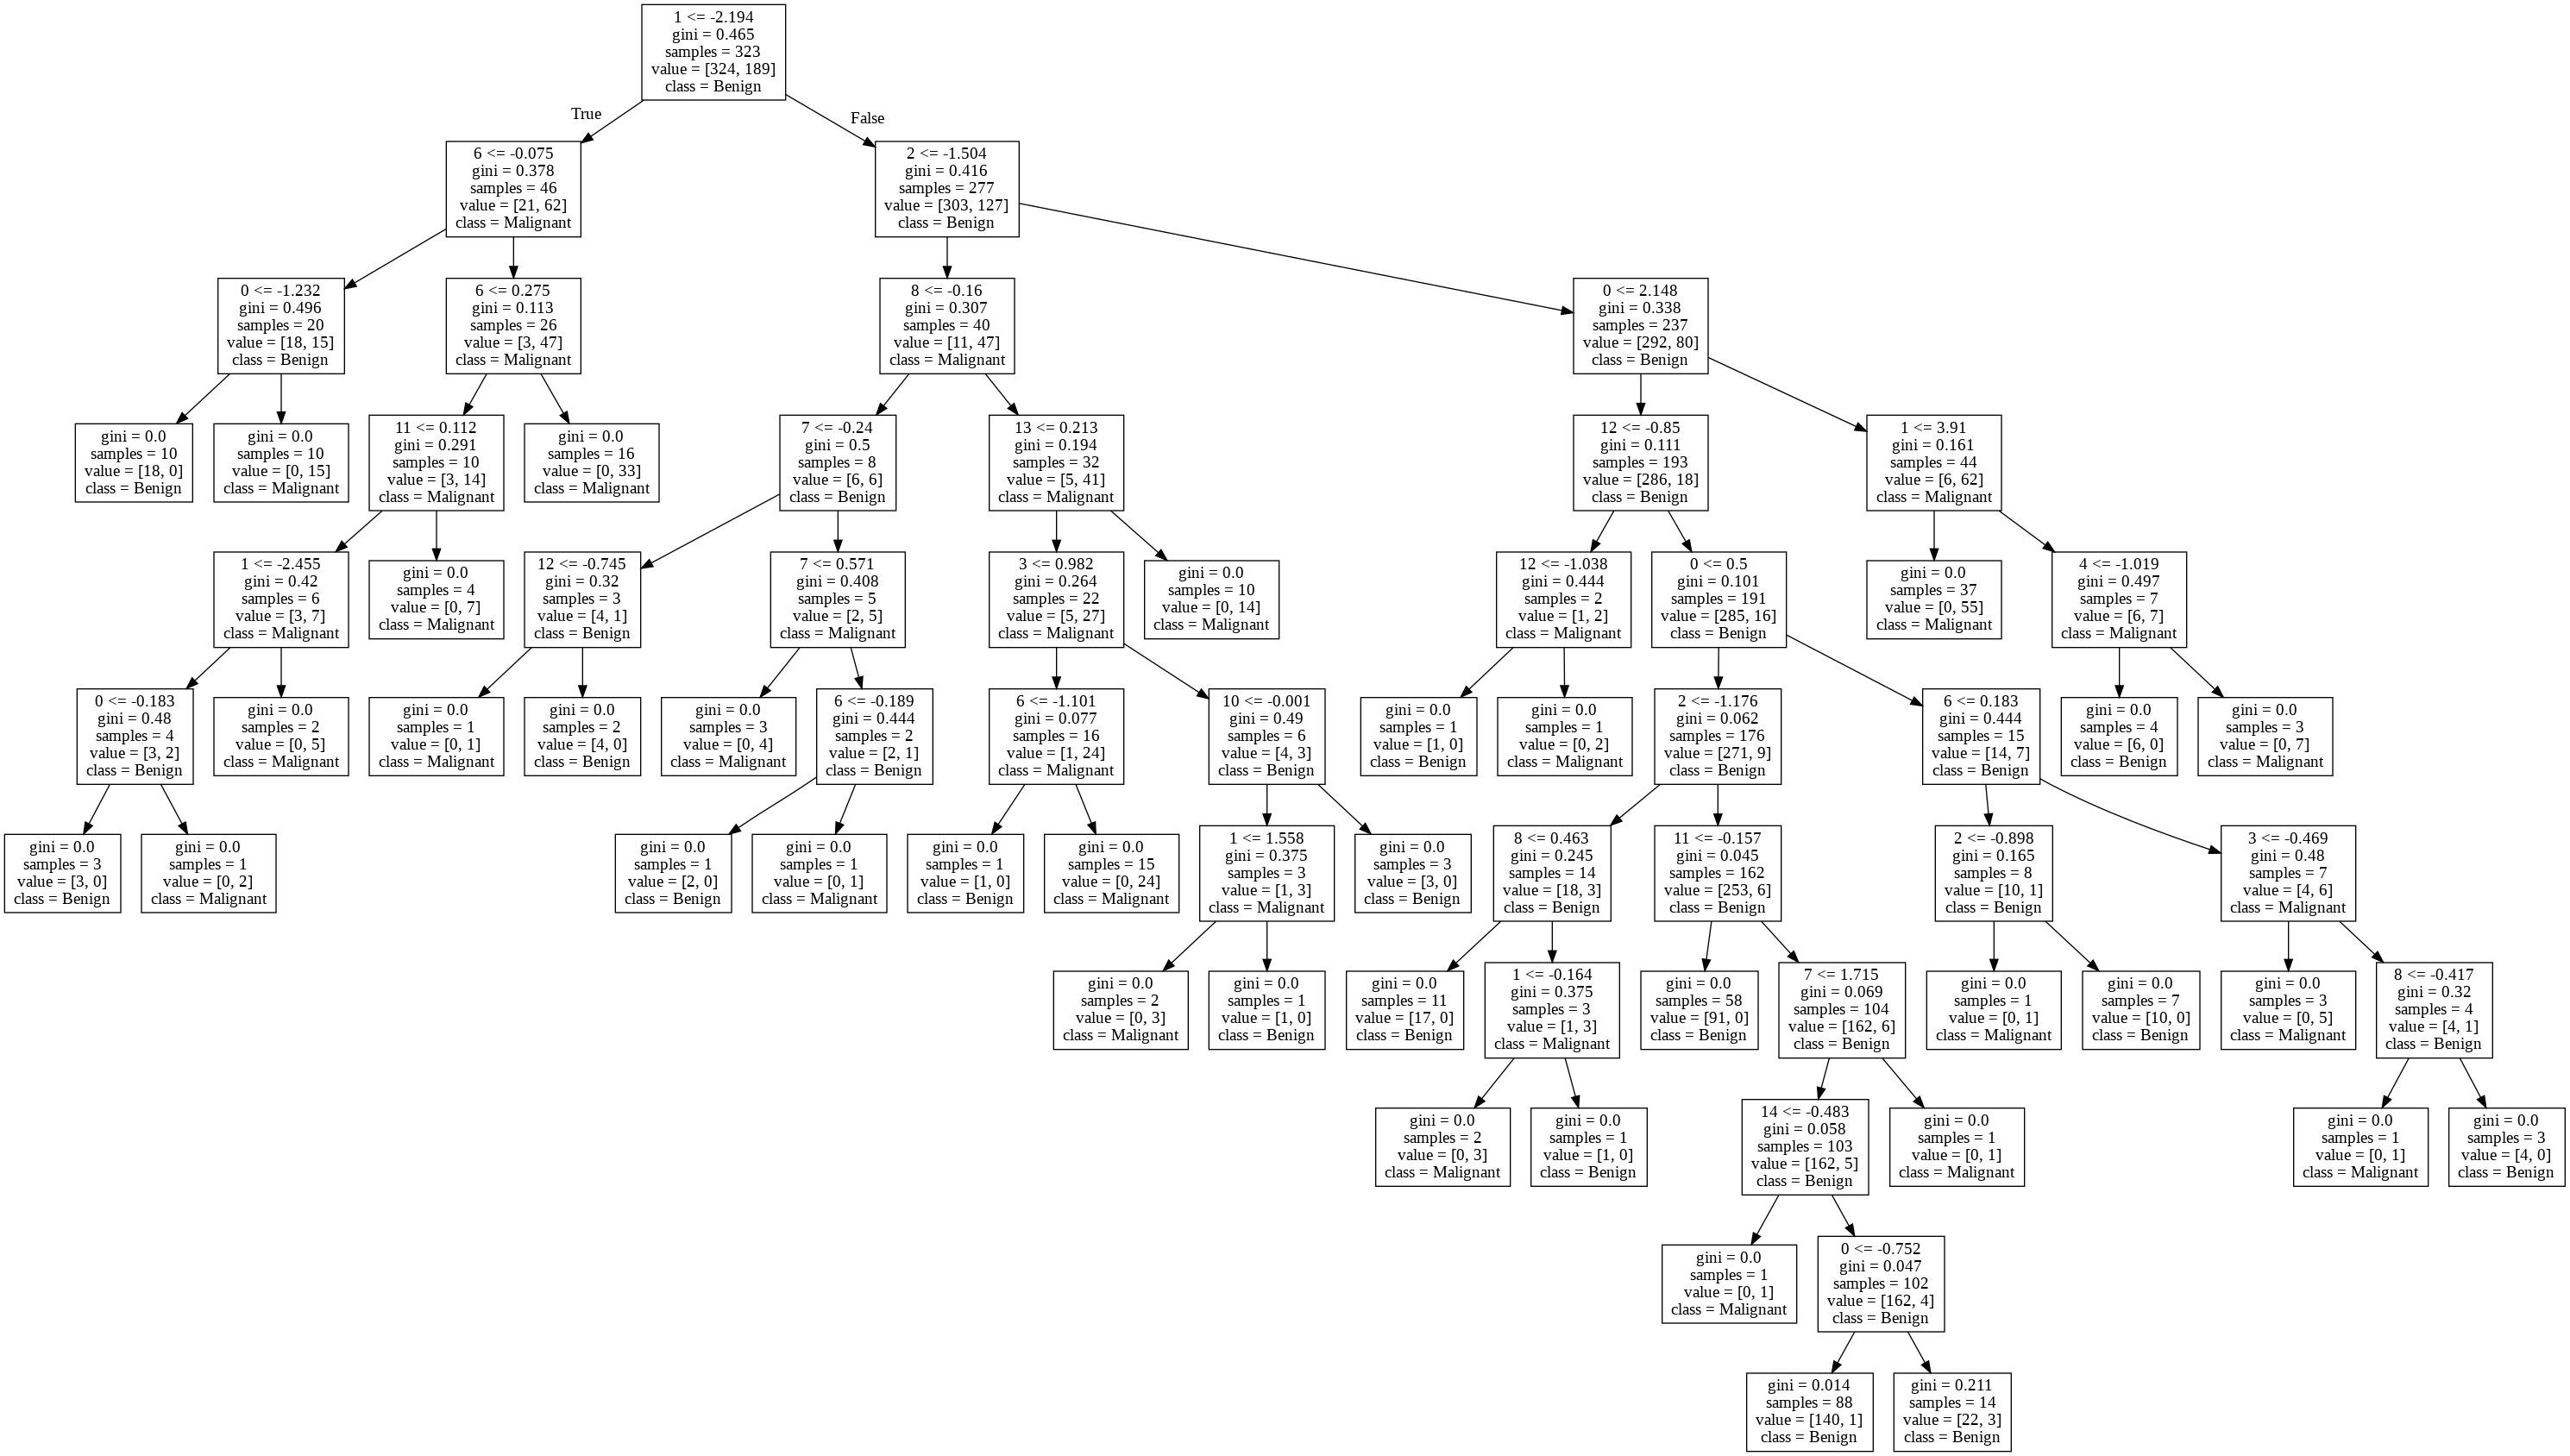

In [0]:
image = Image.open("cancer_1_pca.png")
image

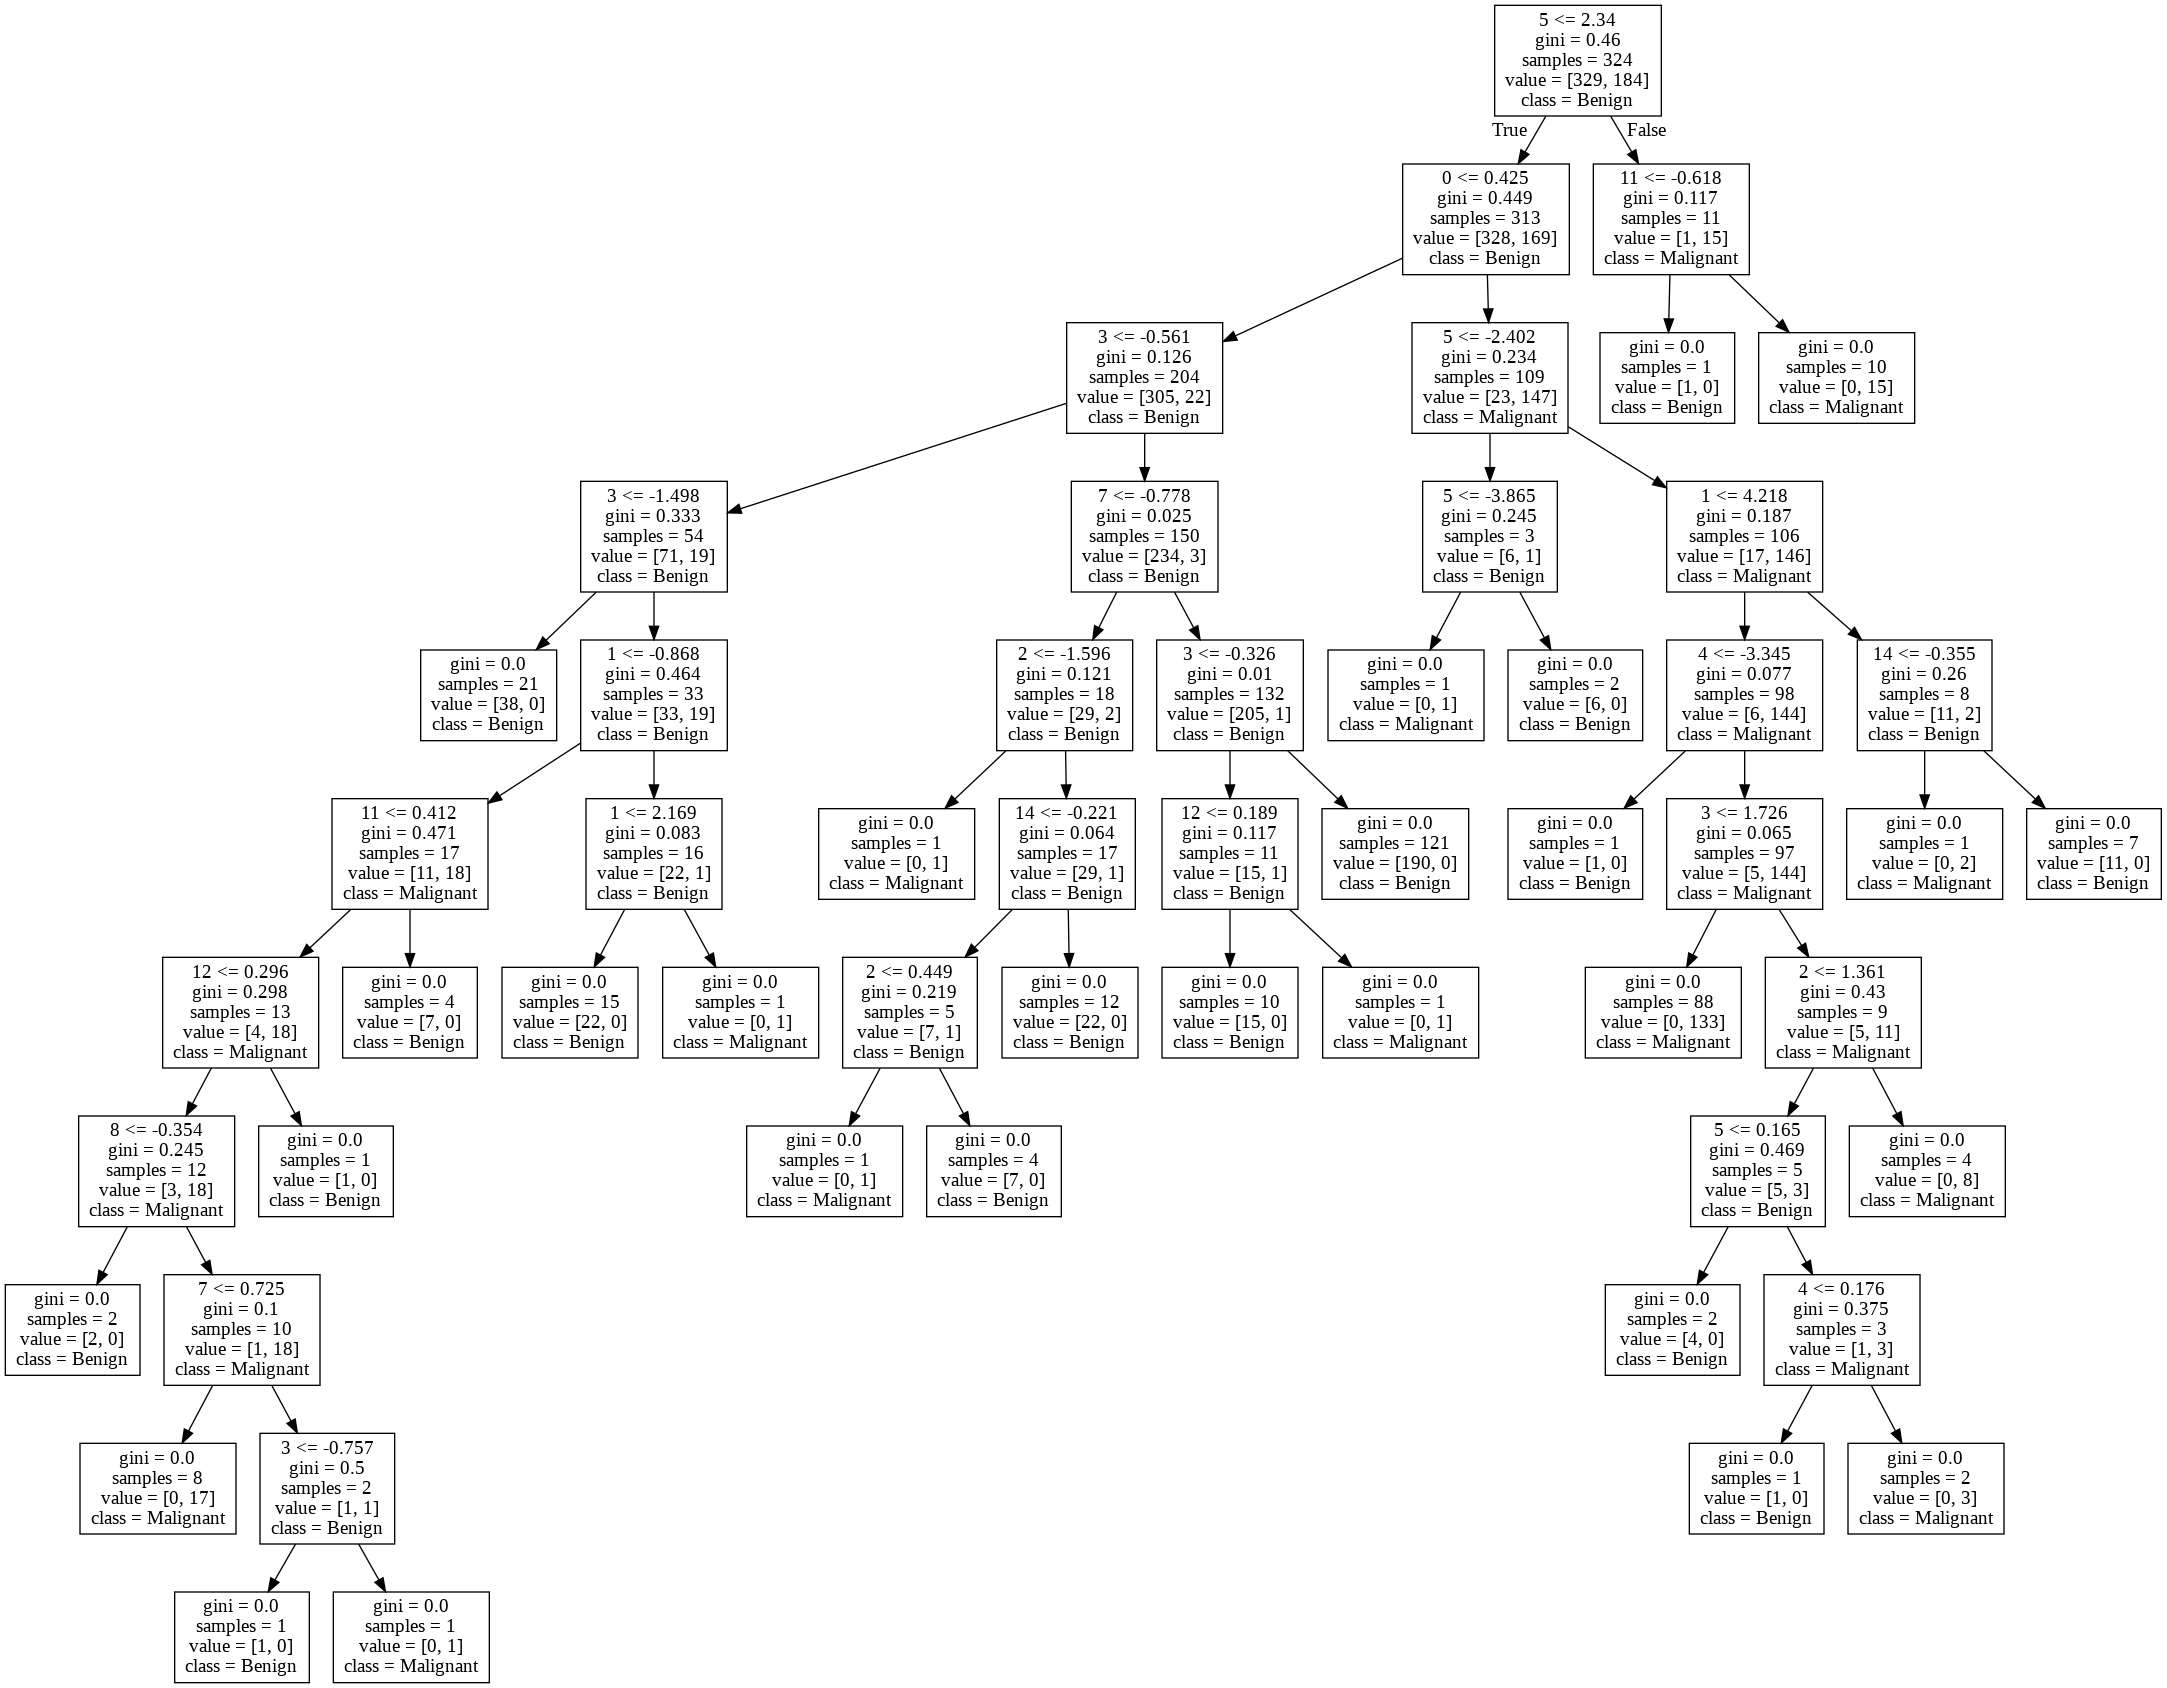

In [0]:
image = Image.open("cancer_2_pca.png")
image

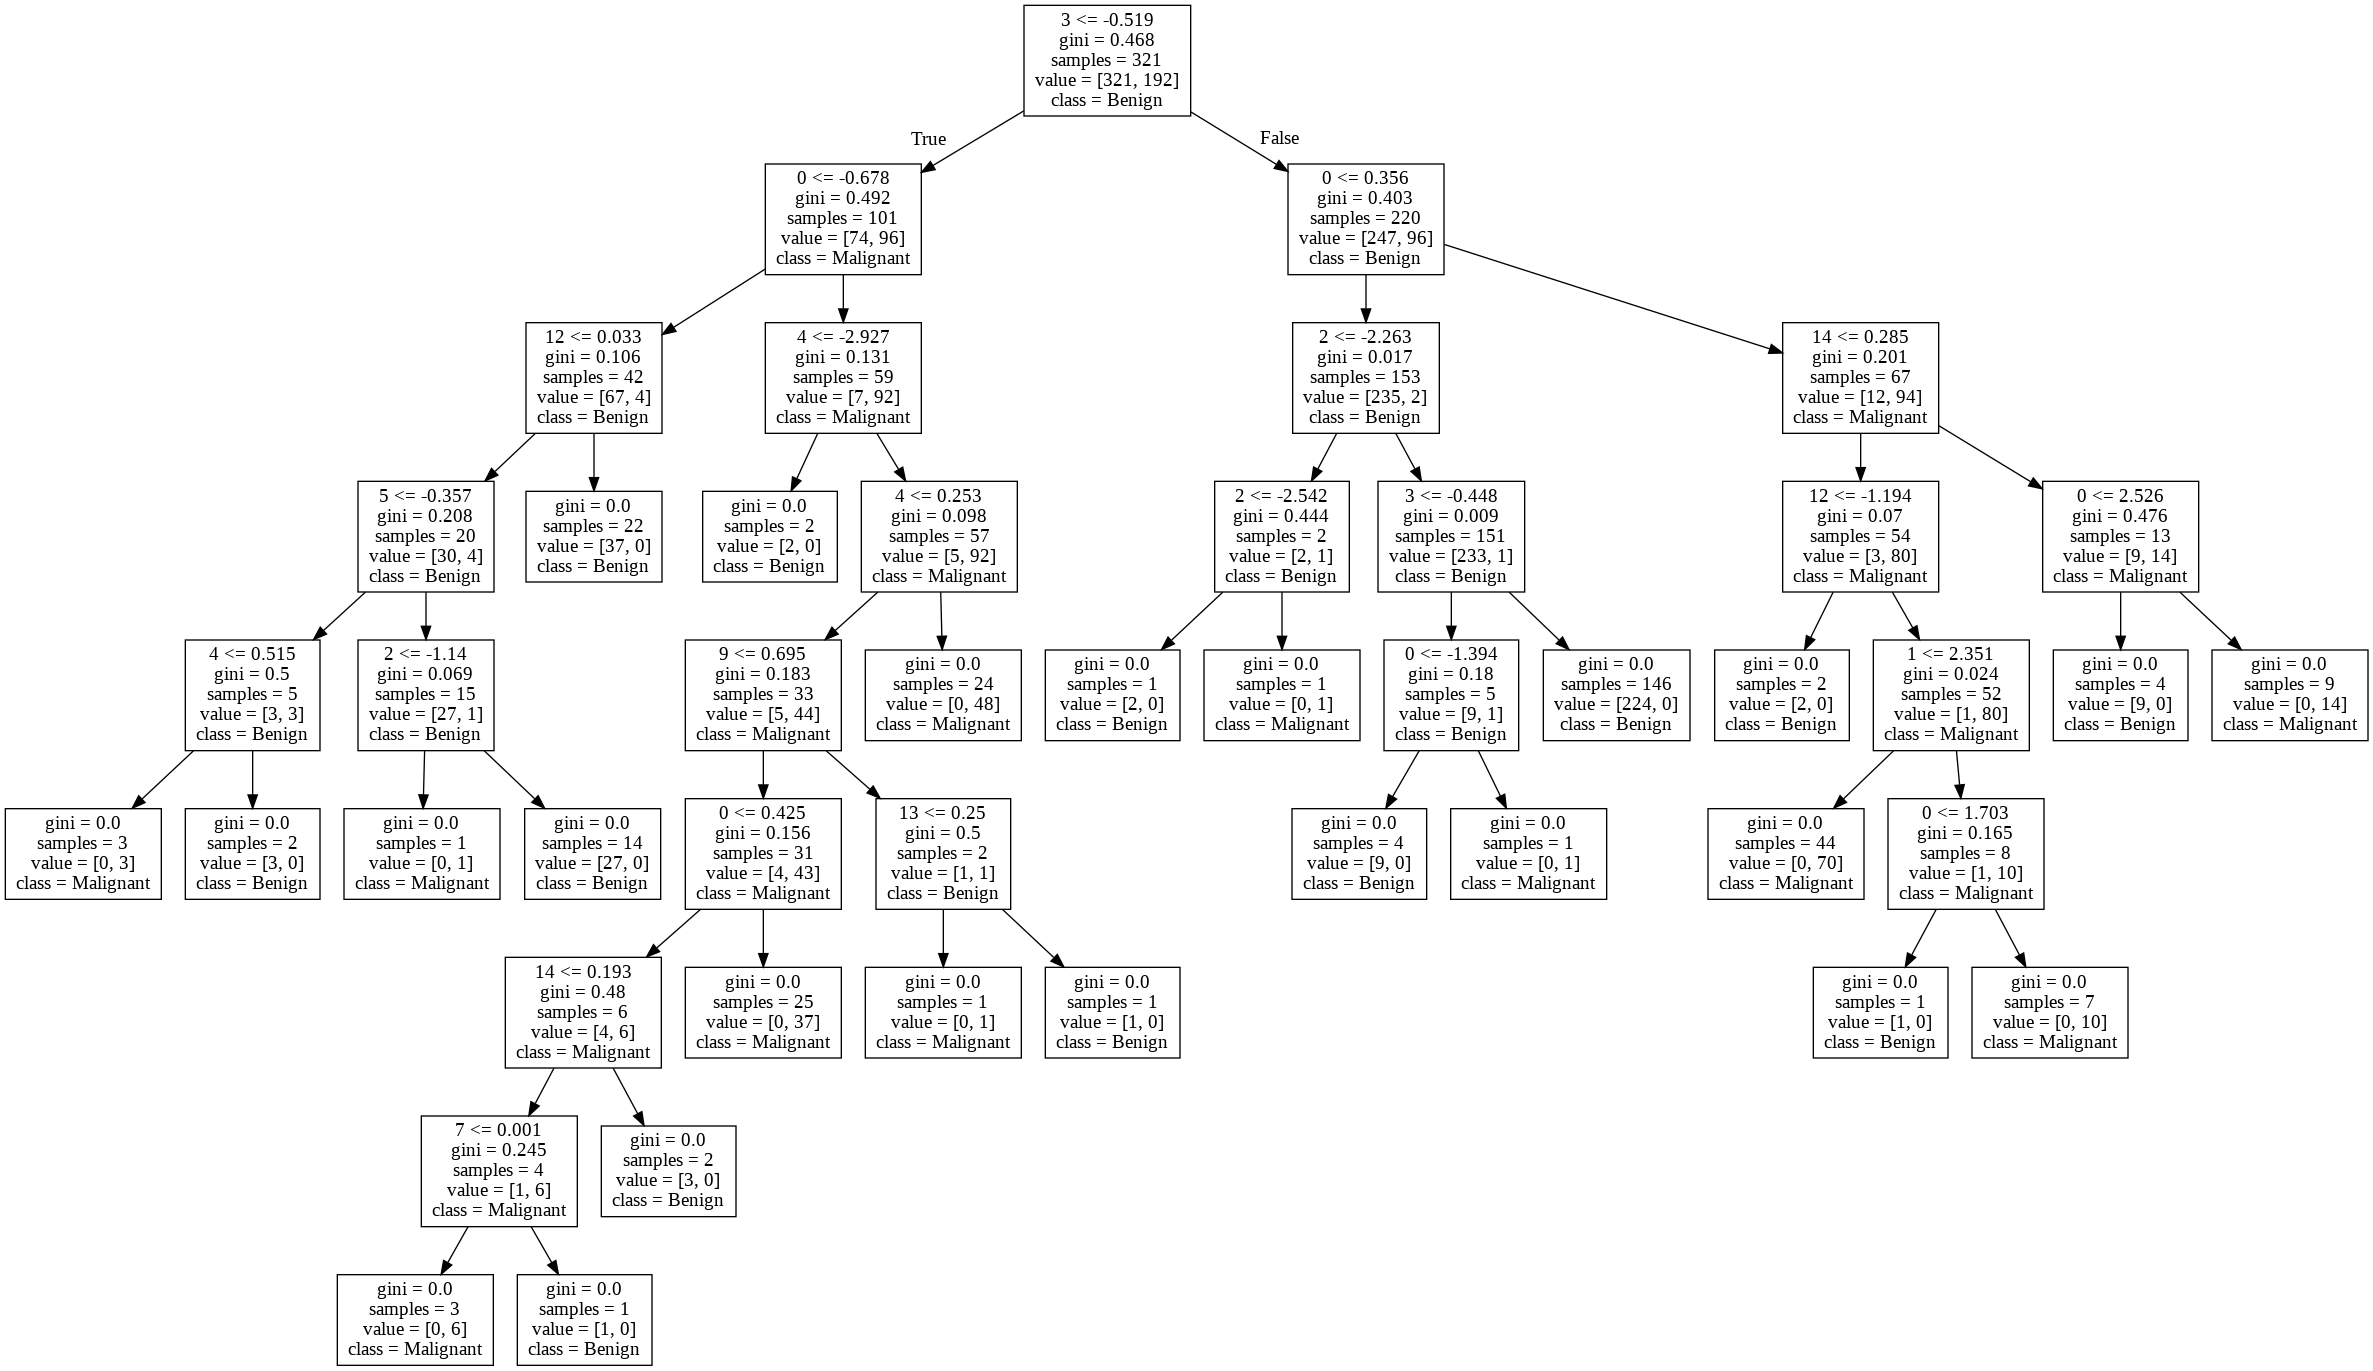

In [0]:
image = Image.open("cancer_3_pca.png")
image

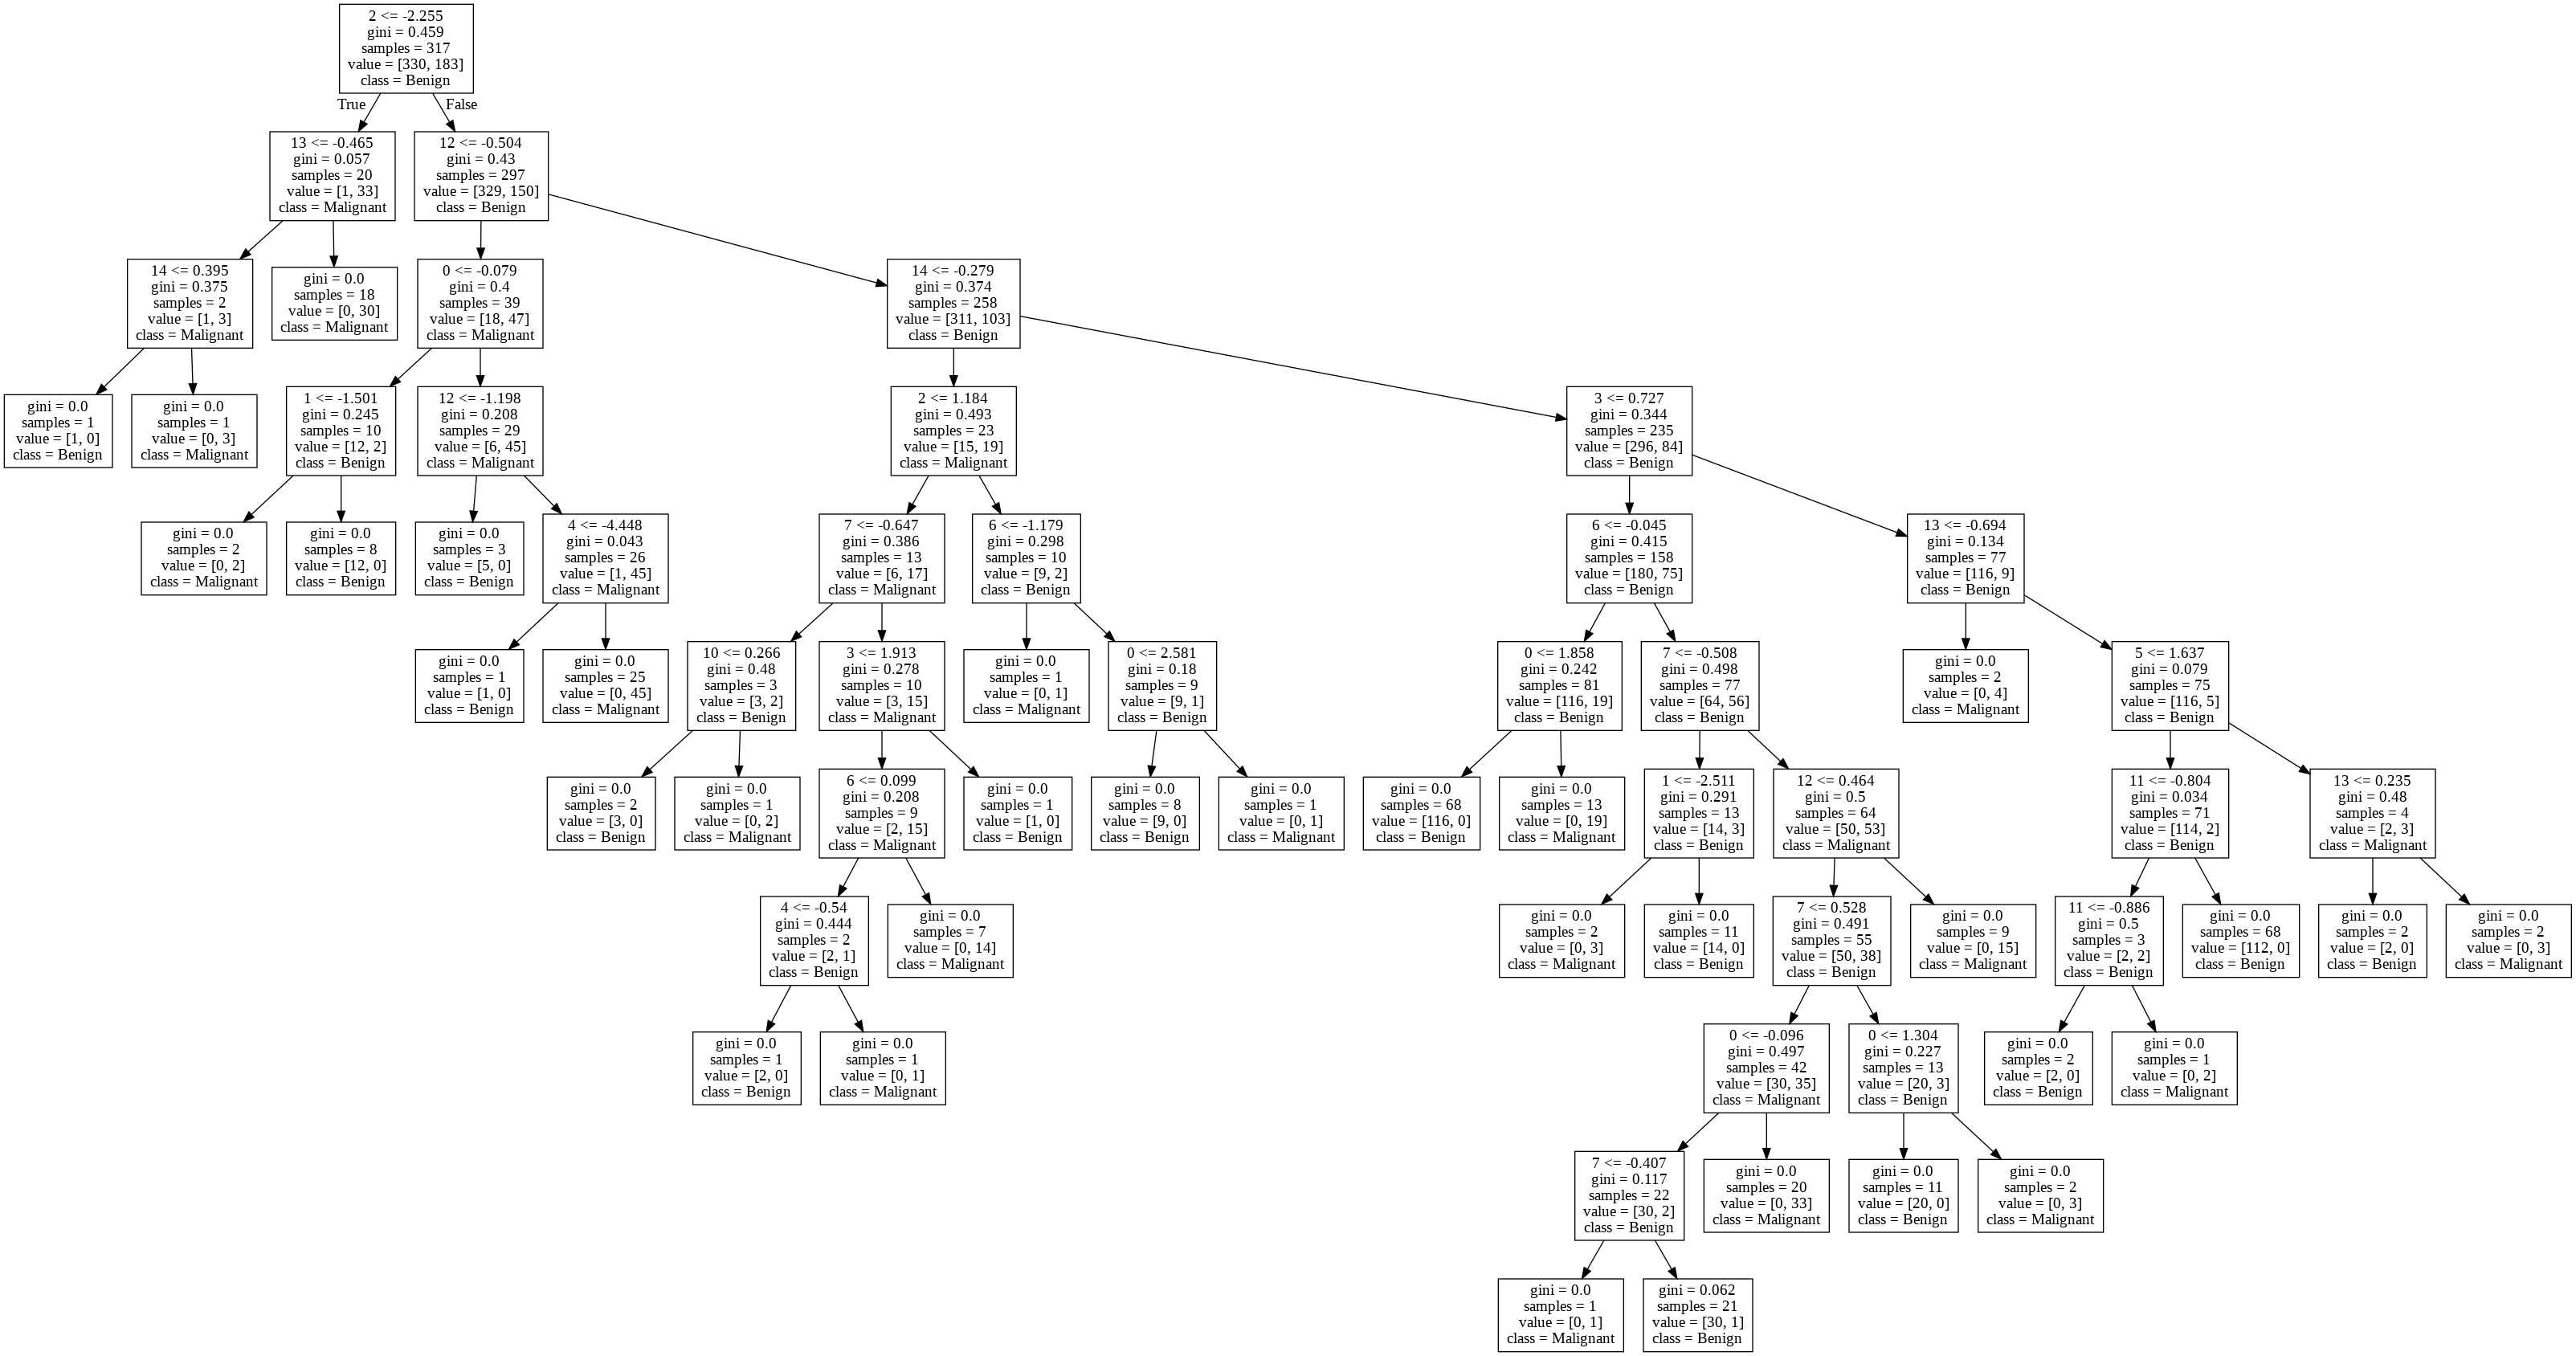

In [0]:
image = Image.open("cancer_4_pca.png")
image

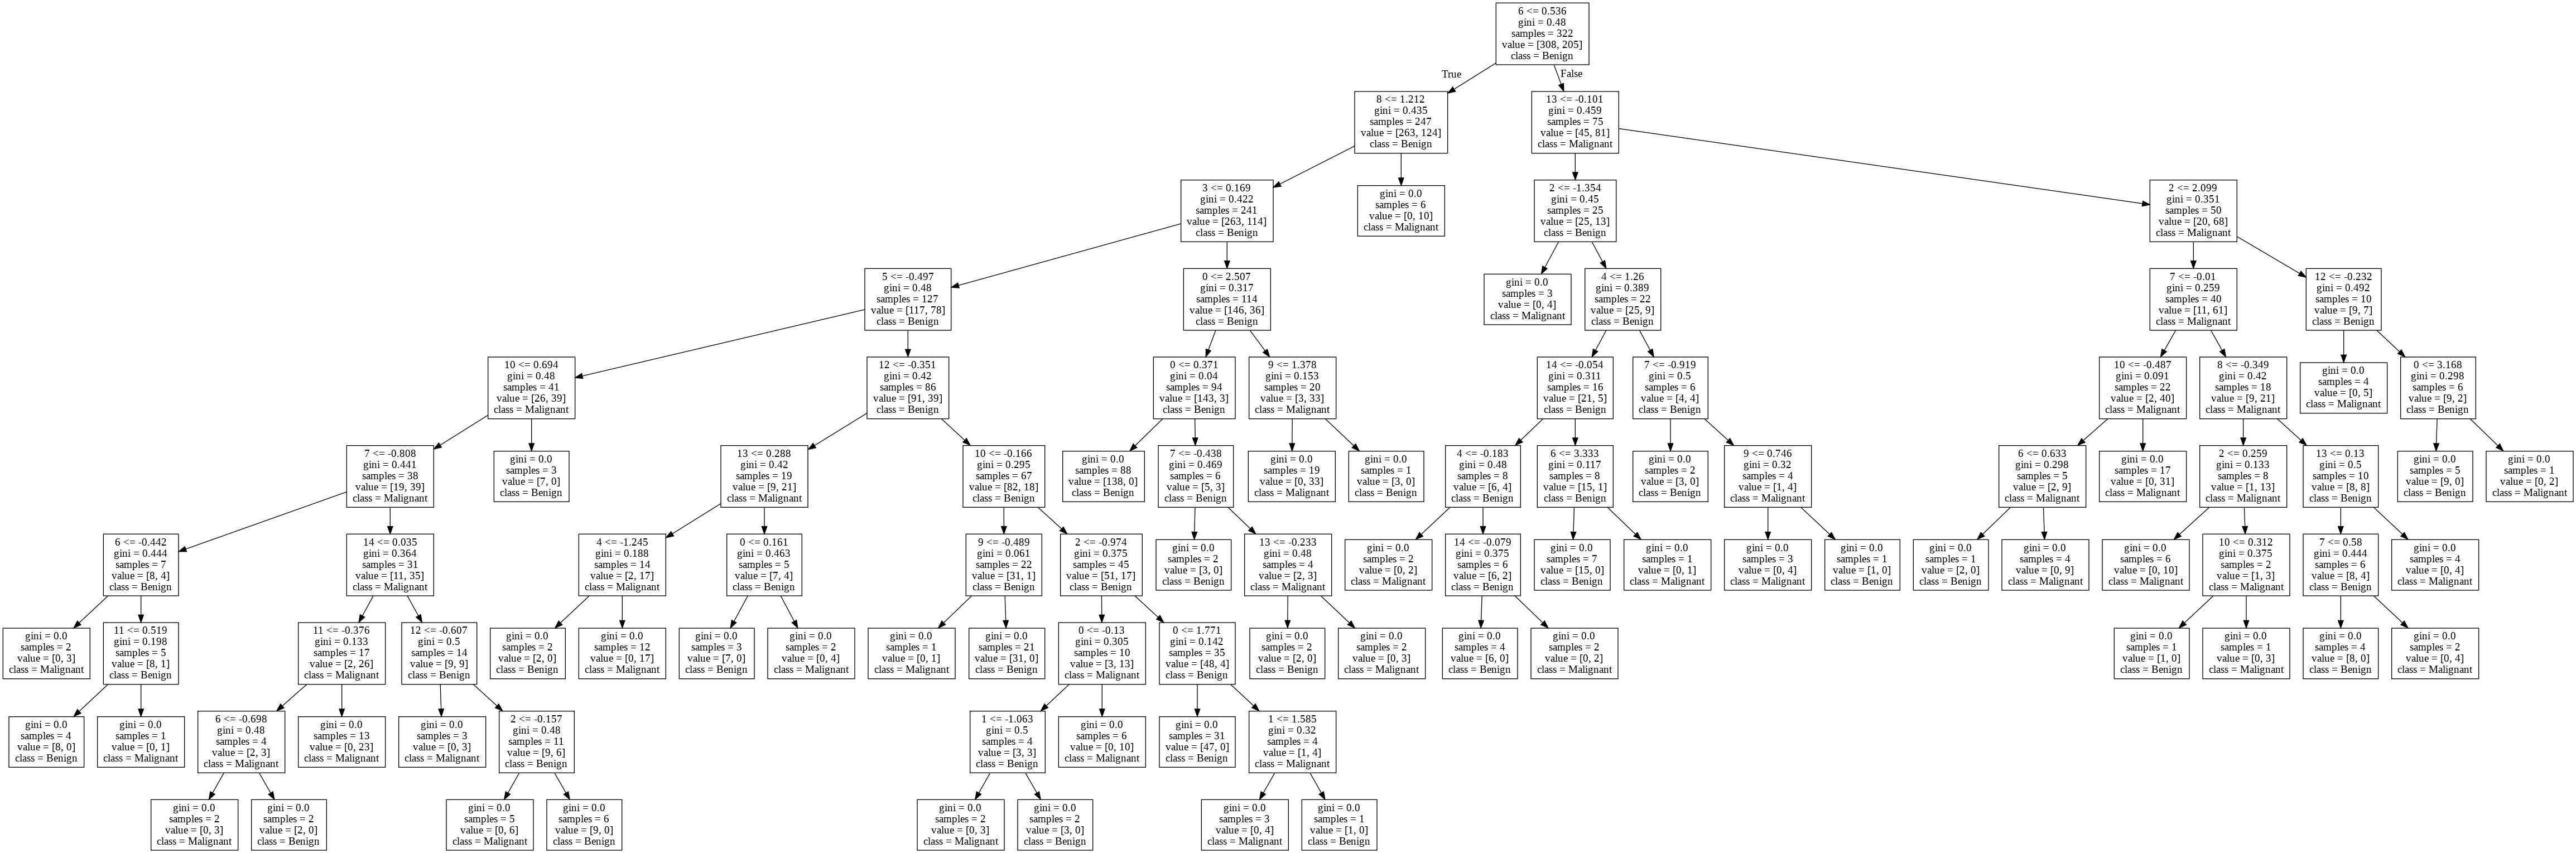

In [0]:
image = Image.open("cancer_5_pca.png")
image

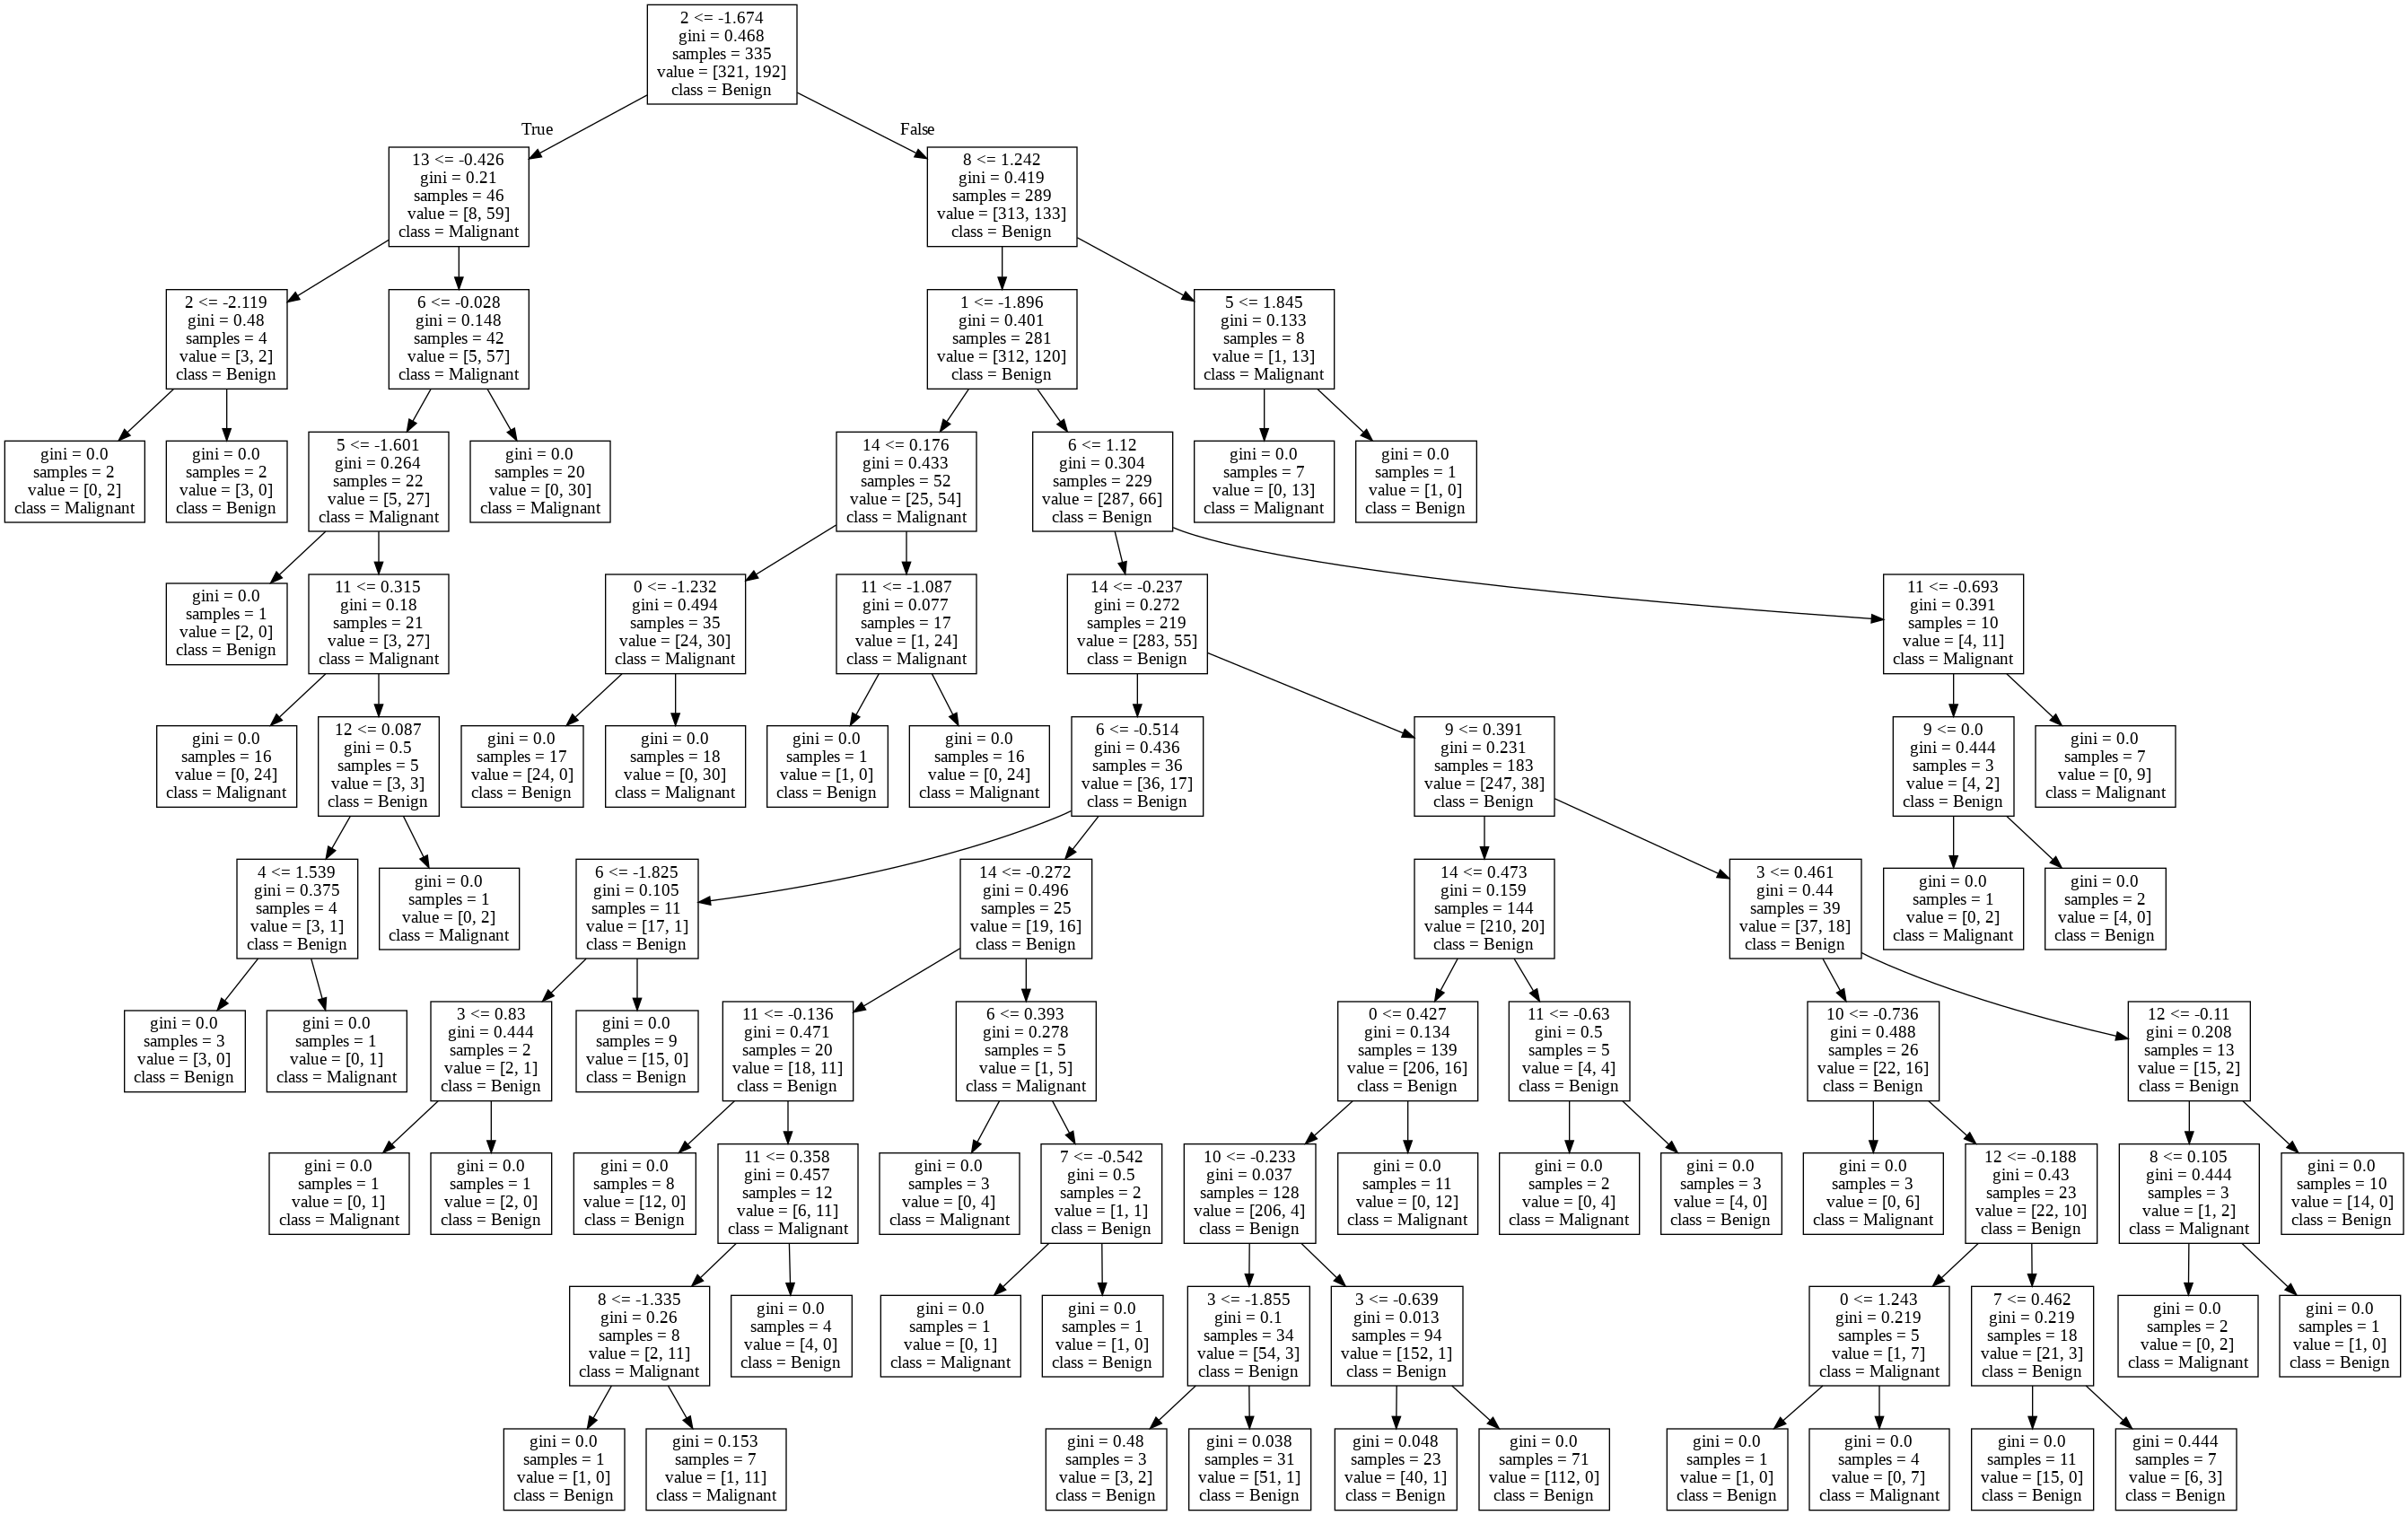

In [0]:
image = Image.open("cancer_6_pca.png")
image

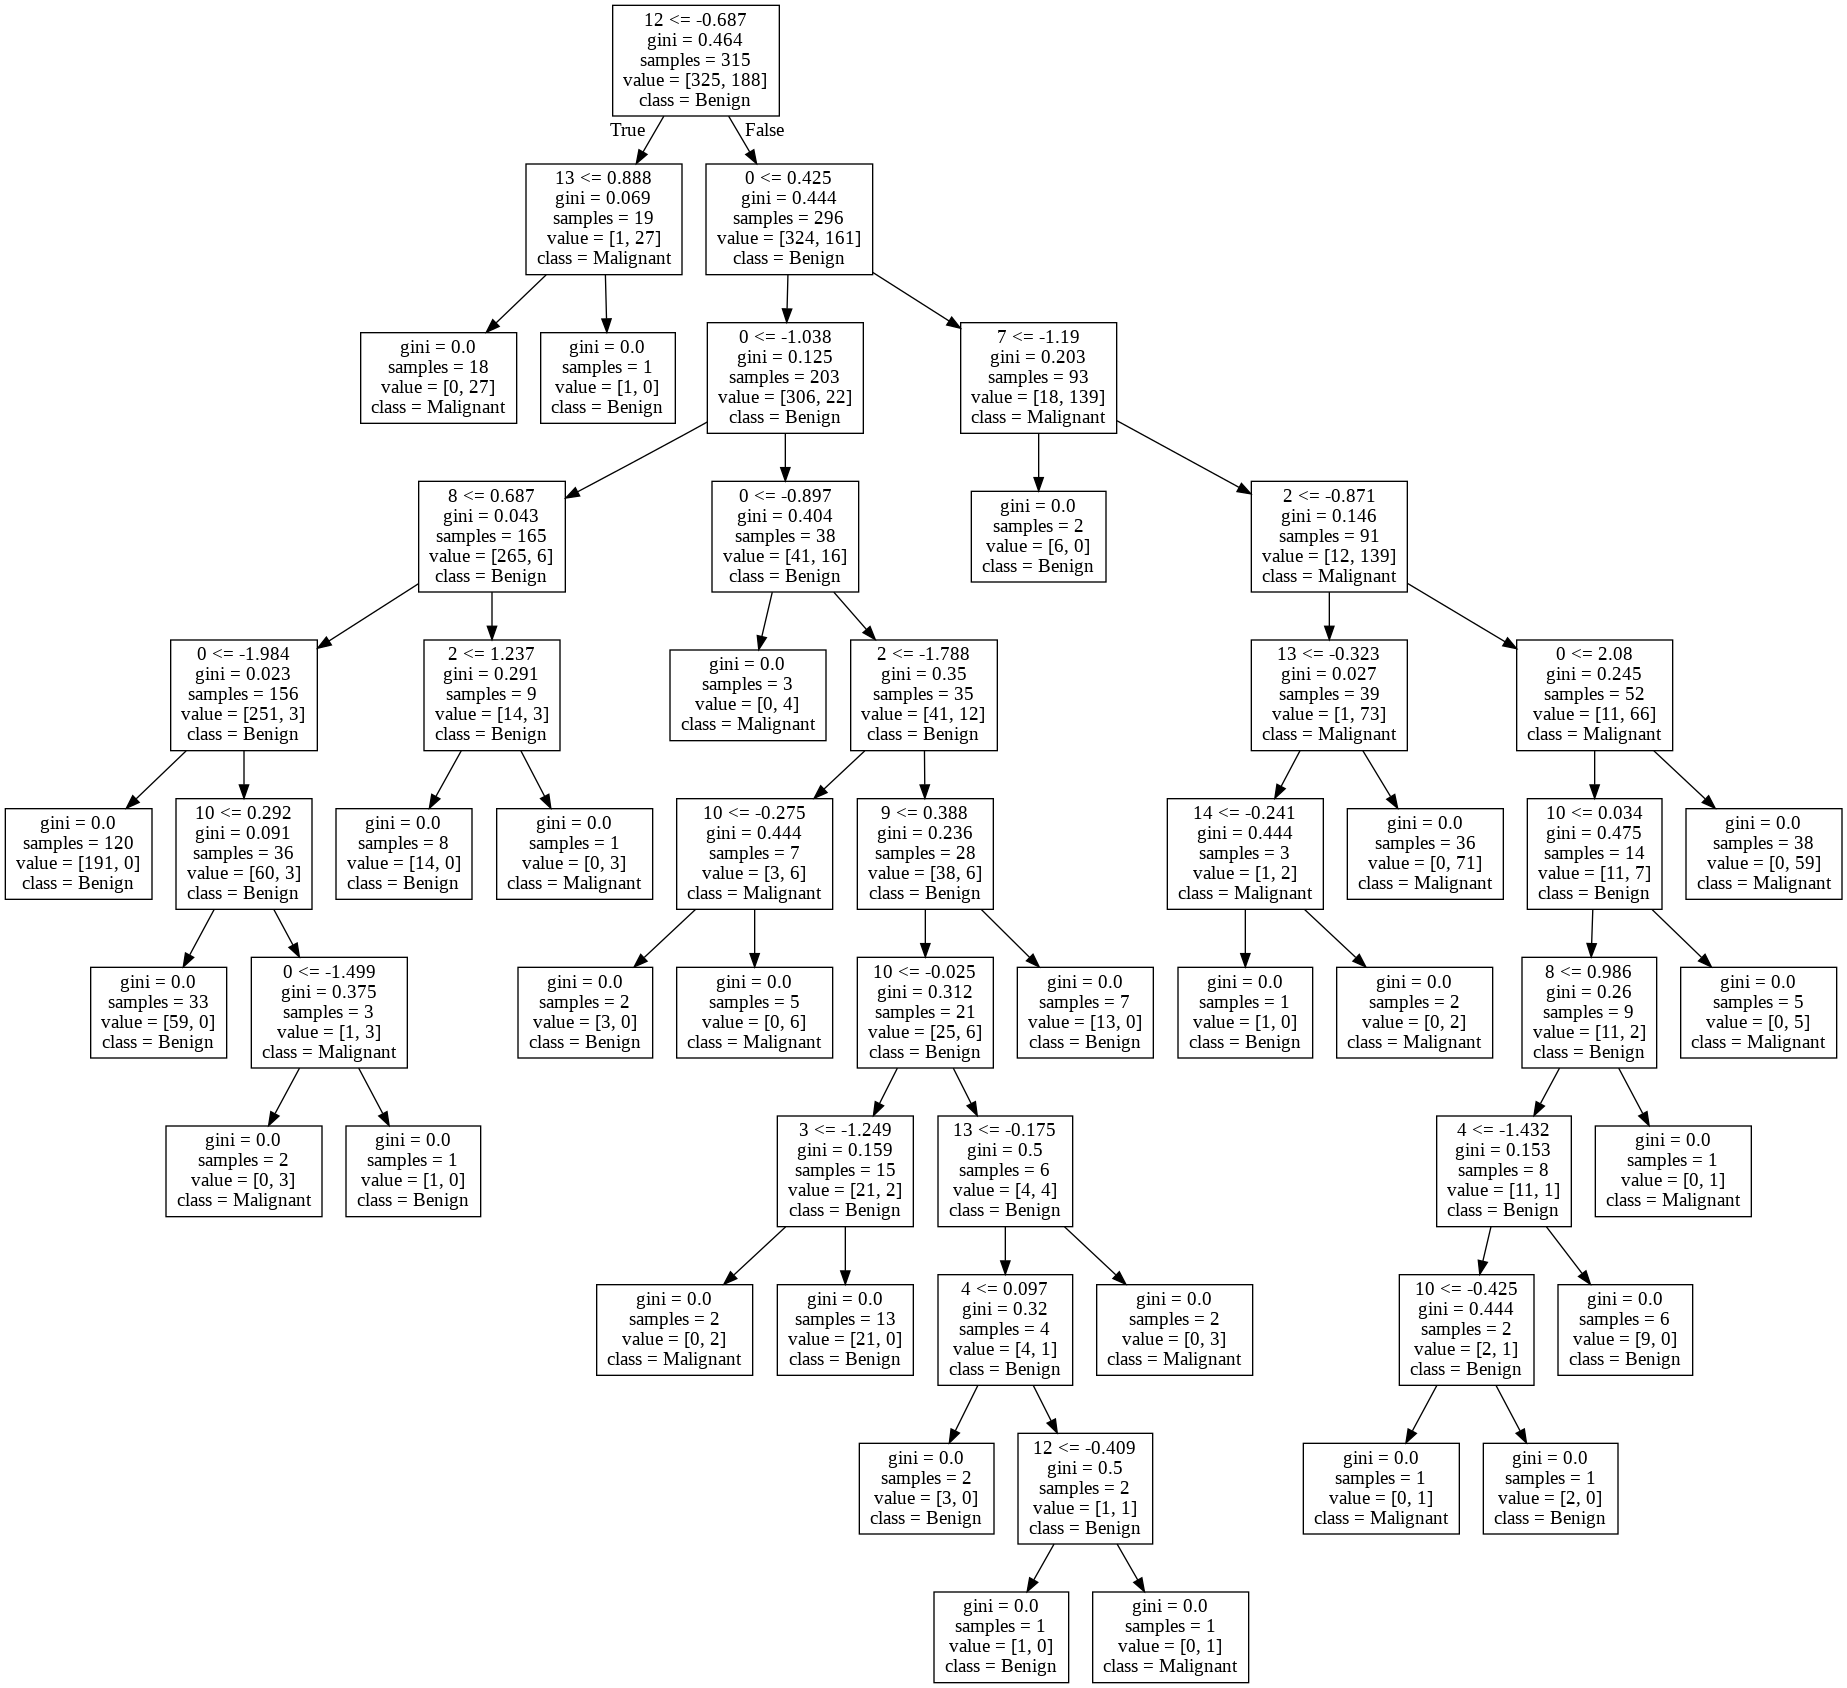

In [0]:
image = Image.open("cancer_7_pca.png")
image

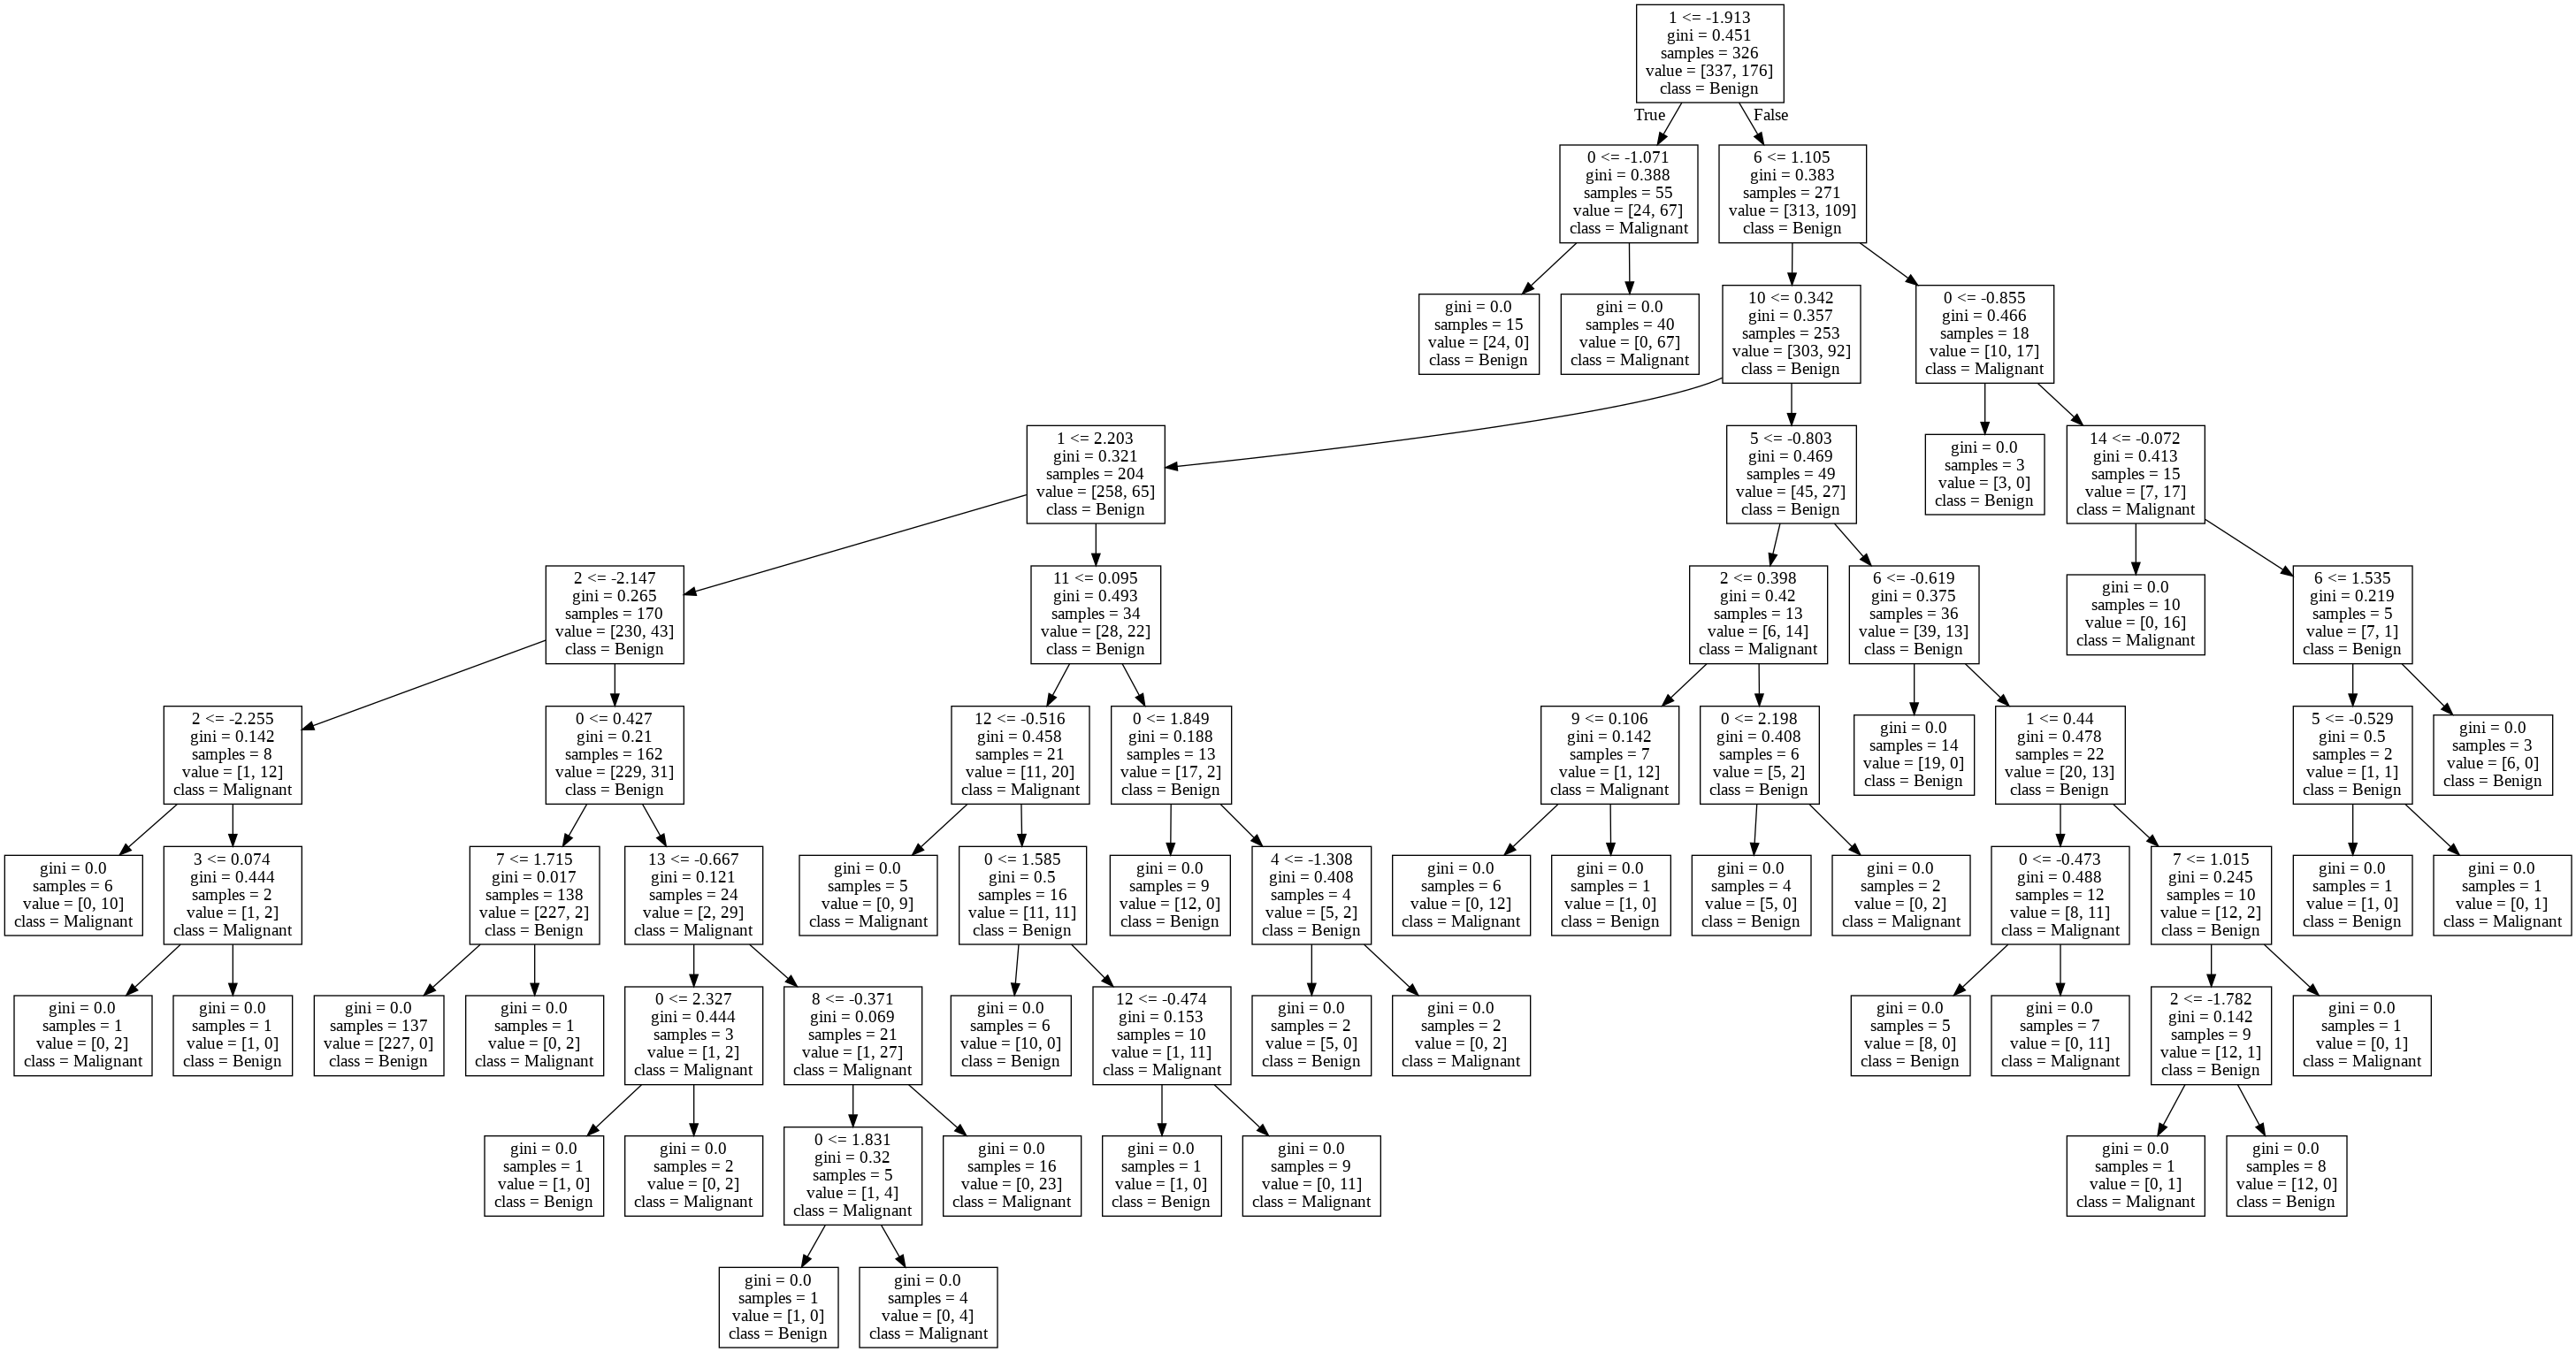

In [0]:
image = Image.open("cancer_8_pca.png")
image

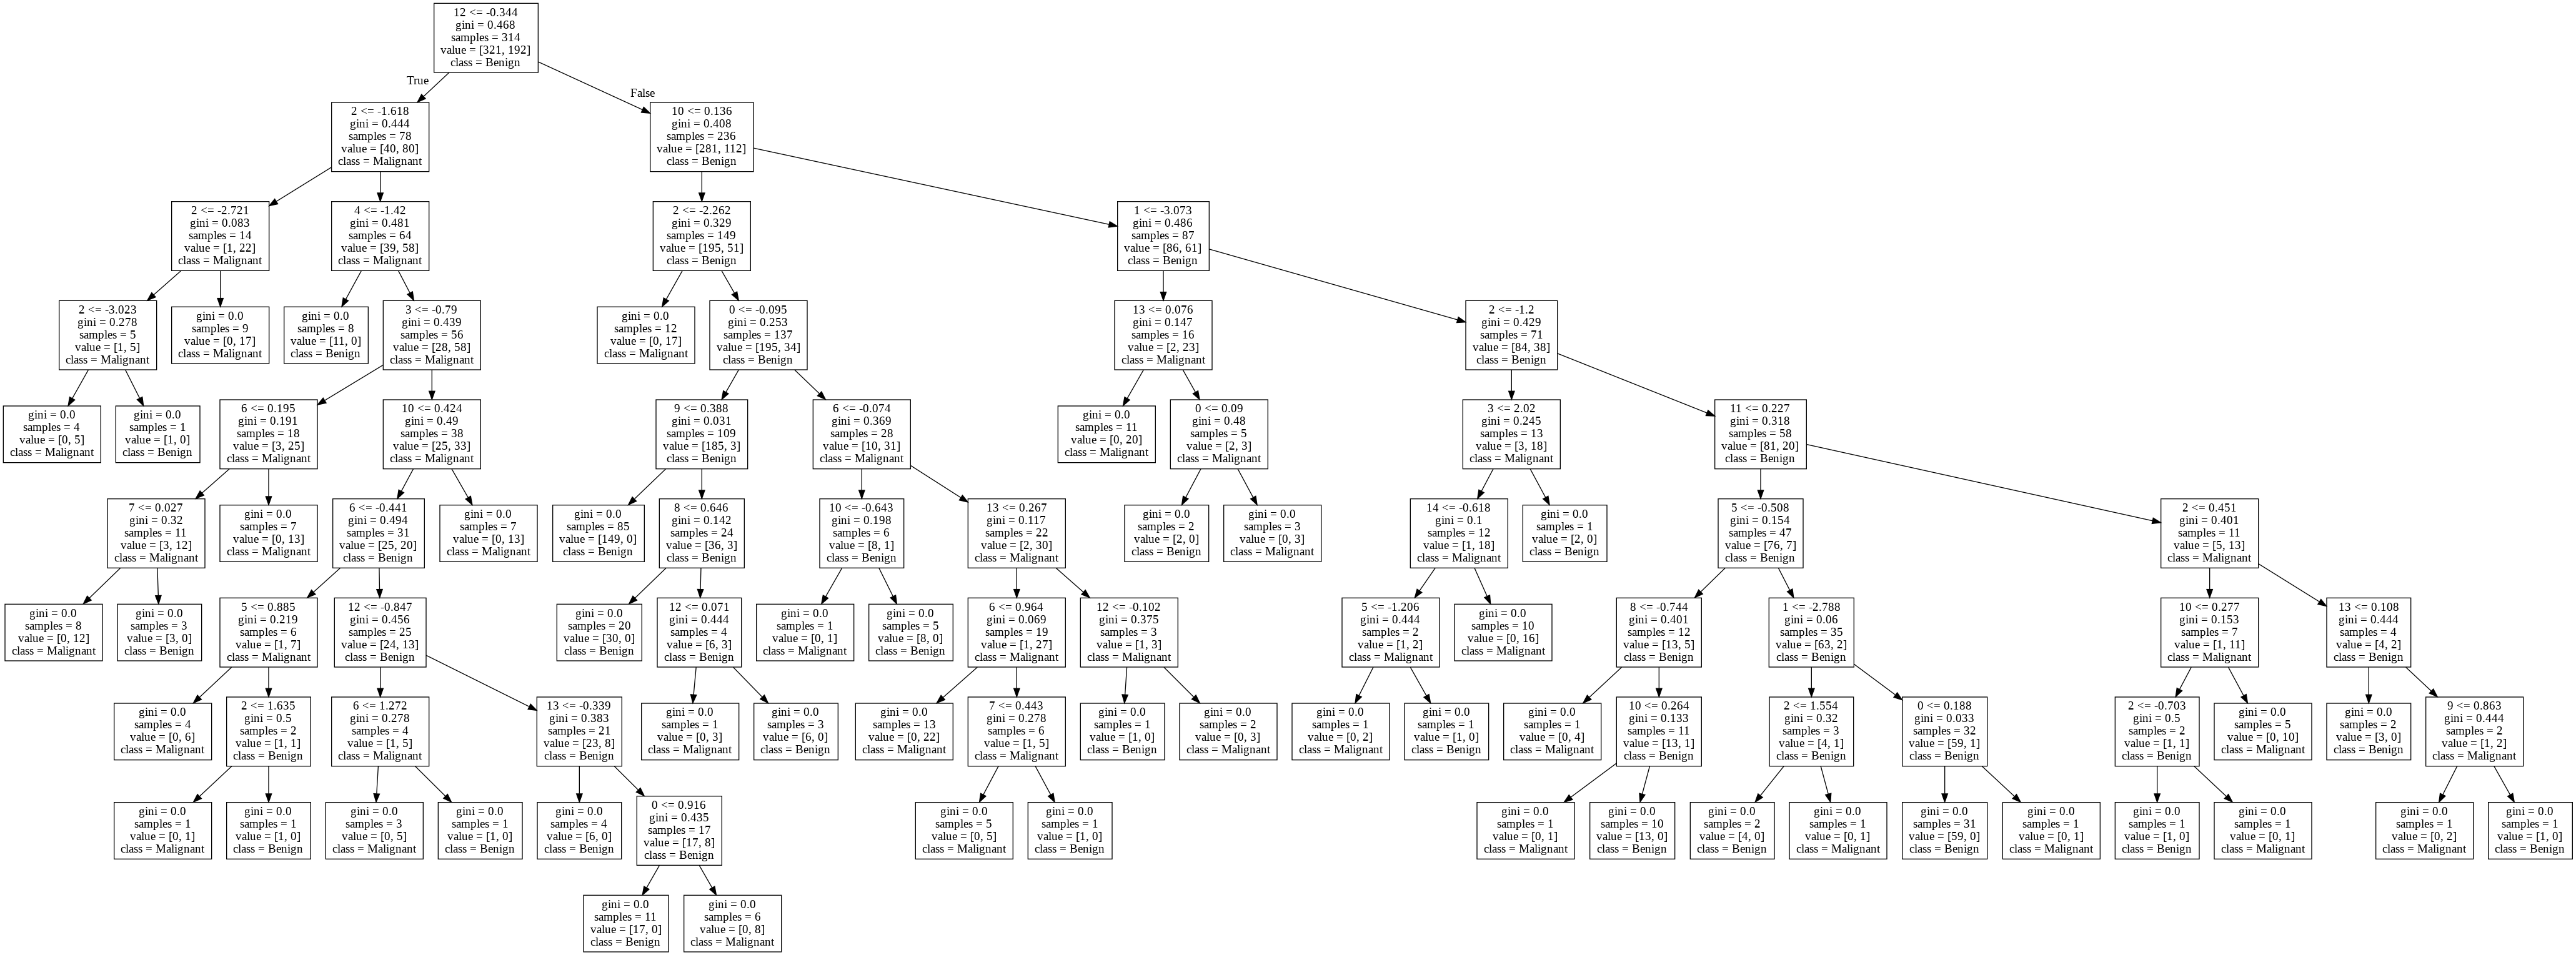

In [0]:
image = Image.open("cancer_9_pca.png")
image

**Random Forest is giving best result on training and test data, So we will take random forest as our base model**

**PCA random forest model gives good accuracy as compare to normal random forest model this is because PCA takes only those features, which are explaining high varience, so because of that we are getting good accuracy for PCA as compare to normal models.**